# Lab 3  

* Murali Parthasaraty
* Gene Ledbetter
* Sanjay Jagarlamudi
* Sarah Beg

# Business Understanding (10 points total).
<font color = 'blue'> • [10 points] Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). How will you measure the effectiveness of a good 
algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?</font>

Like in previous labs, the dataset we are analyzing is the "income" dataset that was donated to the UCI machine learning database. This dataset includes information on over 32,000 patients, and the information gathered includes their age, marital status, education, income, and others. It was originally collected for the purpose of classifying whether any given individual earns an income of less than 50,000 USD a year or more than 50,000 USD a year.  
  
  For this lab, however, we will instead be using clustering methods to see what values and variables cluster together.  This is an exploratory analysis, and we are setting forth in doing the analysis without knowing exactly what we will find.  As such, the goal could be described as simply finding interesting relationships in the data.  Perhaps we will find an association between specific variables and income, or perhaps we will find some other association unrelated to income that we find of interest.  
    
  Regardless of what we find, we will be measuring the effectiveness of our clustering algorithm by the accuracy of the clustering.  Even if we find a clustering that appears to be interesting, if that clustering is imprecise then it is of no use to us.  Because we are the stakeholders using the dataset and our interests are in finding accurate and interesting clusters then the chosen validation method of measuring the clustering accuracy makes the most sense.

# Data Understanding (20 points total)  

<font color = 'blue'>• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?</font>

Because we have used this same dataset in the past, much of the work of verifying data quality has already been done for previous lab assignments.  For example, we had previously found that there were some missing values but no duplicate datapoints.  To deal with these two issues we removed the few observations that were missing data since they accounted for a small fraction of the total observations avaiulable, and the total observations available still exceeded 30,000 after the removal of those containing missing values.  
  
  There were very few outliers as well, due in part to almost all variables being categorical variables.  The one area where outliers could affect things were the continuous variables for capital gain and capital loss.  Both of these continuous variables were scaled such that any outliers that we somehow failed to find would have decreased impact due to being scaled down into a smaller range of values.   

In [1]:
# This code imports the packages we will be using, and sets parameters for the matplotlib.pylab package.

from sklearn.neighbors import KNeighborsClassifier   #to perform KNN classification 
from sklearn.cross_validation import StratifiedKFold #to split data 
from sklearn import metrics as mt                    #to see if model is doing how well
from sklearn.ensemble import RandomForestClassifier  #to perform RF classification
from sklearn.linear_model import LogisticRegression  #to perform LR classification
from sklearn.svm import SVC                          #to perform SVM classification
from sklearn.cross_validation import cross_val_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import sqlite3 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as pylab
import plotly.plotly as py
import plotly.graph_objs as go
from sklearn import datasets, linear_model
from sklearn.linear_model import BayesianRidge, LinearRegression,LogisticRegression
from sklearn.cross_validation import train_test_split
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%matplotlib inline




In [2]:
# Path to where all of the data set files resides 
path = 'data'

In the below sections of code we will perform the same data cleaning and formatting steps that we have done for this data set in previous labs.  This will include reading in the initial csv file, modifying the target array to represent 0 and 1, dropping unneeded variables, scaling our continuous variables, and performing one-hot encoding on our categorical variables

In [4]:
# This code reads in the initial csv file
filename = path + '/income.csv'
df_income = pd.read_csv(filename) #read in the csv file
df_income.info()                  #run it for two reasons which variables in our data and any nulls
df_income.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# This code creates a target array with 0 representing under 50,000 USD a year and 1 representing over 50,000 USD a year

i = 0
rangeLength = len(df_income)
#print(rangeLength)
target = []
for i in range(0,rangeLength):
    if df_income['target'].iloc[i] == " <=50K":
        target.append(0)
    else:
        target.append(1)
#print(target)

In [6]:
# This code replaces the existing 'target' variable with our newly created array of integer representations.

df_income['income'] = target
df_income = df_income.drop('target', axis=1)
df_income.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [7]:
# this code drops the "fnlwgt" variable, which is a weighting variable used for stratified sampling that is not going to be 
# useful for us in our lab 3 clustering tasks.

df_income = df_income.drop('fnlwgt', axis=1)
df_income.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0



We decided to standardize only capital-gain and capital-loss only and not any other variables as they are all either categorical variables, or they are on a small scale that makes less sense if standardizes such as hours per week, age, and education-num.

We standardize the capital-gain and capital-loss values to a scale from 0 to 100, rather than a more traditional 0 to 1, in order to make them more closely match the naturally occurring scales in the other variables.

In [8]:
# This code standardizes the two continuous variables related to capital gain and capital loss.

from sklearn.preprocessing import MinMaxScaler
df_income['capital-gain'] = MinMaxScaler(feature_range=(0,100)).fit_transform(df_income['capital-gain'])
df_income['capital-loss'] = MinMaxScaler(feature_range=(0,100)).fit_transform(df_income['capital-loss'])
df_income.head()

/Users/p00012387/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning:

Data with input dtype int64 was converted to float64 by MinMaxScaler.

/Users/p00012387/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/Users/p00012387/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning:

Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

/Users/p00012387/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning:

Data with input dtype int64 was converted to float6

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2.174022,0.0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40,Cuba,0


We decide to use get_dummies function to convert categorical variable into dummy/indicator integer variables. The get_dummies returns a new column for each unique item where the value in the column indicates whether or not the record has that attribute. the dummy variables will help run the classifications efficiently.  

In [9]:
# This code drops the target, then gives us one-hot encoding for the categorical variables, rather than a mix of integer values 
# and descriptive string values.  We will use this newly created "df_dummies" variable later on for classification that requires
# one-hot encoding to perform well.
df_intermediate = df_income.drop('income', axis=1)
df_dummies = pd.get_dummies(df_intermediate)
df_dummies.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,13,2.174022,0.0,40,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,13,0.000000,0.0,13,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,9,0.000000,0.0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,7,0.000000,0.0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,13,0.000000,0.0,40,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The final dataset we have created consists only of continuous variables (some integers some scaled to floats), categorical variables that are represented as integers, and binary variables that are represented as integers.  This provides an acceptable dataset to work with both for the previously performed classification tasks as well as the clustering tasks we will be performing in lab 3.
  
Variables:
Age - continuous(integer) - the individual's age in years.  
workclass - categorical(integer) - the class of the worker's employment (self-employed, public, private, etc.).  
education - categorical(integer) - the level of education obtained (high school, bachelor's degree, master's degree, etc.).  
education-num - continuous(integer) - the level of education obtained as represented by number of years of education.  
marital-status - categorical(integer) - The current marital status of the individual (married, never married, divorced, etc.).  
occupation - categorical(integer) - The type of work the individual is employed in (executive, janitorial, etc.).  
relationship - categorical(integer) - What part the individual plays in their current relationship (husband, wife, etc.).  
race - categorical(integer) - the individual's race.  
sex - categorical(binary) - the individual's gender where 0 is female and 1 is male.  
capital-gain - continuous(scaled to float) - the individual's amount of capital gain as measured in US dollars.  
capital-loss - continuous(scaled to float) - the individual's amount of capital loss as measured in US dollars.  
native-country - categorical(integer) - the native country for that individual (USA, Ecuador, etc.).  
income - categorical(binary) - The individuals general income level where 0 is less than 50,000 US dollars of income a year and 1 is more than 50,000 US dollars of income a year.  


<font color = 'blue'>• [10 points] Visualize the any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.</font>

Below we will provide the visualizations for the important attributes as well as the code that was used to generate those visualizations.  This work was originally performed to complete various sections of lab 2, but is well fitted to the requirements of the rubric point.  As such it has been reproduced here with only small modification from how it appeared in lab 2.

('Size of the dataset:', (32561,))
('Number of unique classes:', 2)


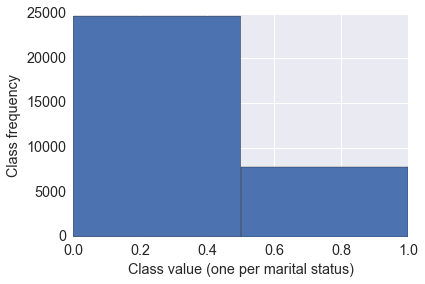

In [10]:
# This code shows a graphical representation of the class value distribution for the income variable.
# This code was built upon the example provided in the "Grand Poobah Classification Notebook" from course materials

print( 'Size of the dataset:', df_income['income'].shape)
print( 'Number of unique classes:', len(df_income['income'].unique()))

plt.hist(df_income['income'], bins=len(df_income['income'].unique()))
plt.xlabel('Class value (one per marital status)')
plt.ylabel('Class frequency')
plt.show()

('Size of the dataset:', (32561,))
('Number of unique classes:', 7)


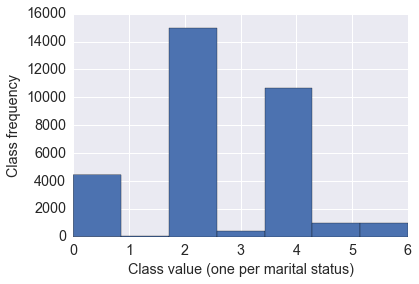

In [11]:
# This code shows a graphical representation to the one above, this time for the marital-status variable.
# This code was built upon the example provided in the "Grand Poobah Classification Notebook" from course materials

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()

print( 'Size of the dataset:', df_income['marital-status'].shape)
print( 'Number of unique classes:', len(df_income['marital-status'].unique()))

maritalplot = encoder.fit_transform(df_income['marital-status'])

plt.hist(maritalplot, bins=7)
plt.xlabel('Class value (one per marital status)')
plt.ylabel('Class frequency')
plt.show()

In [12]:
inputfile = path + '/income.csv'
dfincome = pd.read_csv(inputfile)
dfincome.info()
dfincome.columns
dfincome.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


RangeIndex(start=0, stop=32561, step=1)

Next we will do some small additional preparation steps upon the data to get a dataframe specifically tailored to the visual comparisons we are about to perform.

In [13]:
dfincome.workclass = dfincome.workclass.replace(' ?','NotReported')
dfincome.occupation = dfincome.occupation.replace(' ?','NotReported')
dfincome.workclass = dfincome.workclass.str.strip().replace('Never-worked','NotWorked')
dfincome['native-country'] = dfincome['native-country'].replace(' ?','NotReported')
dfincome['native-country'] = dfincome['native-country'].str.strip().replace('United-States','US')

targetfinal = []
for row in dfincome['target']:
    if row.strip() == '<=50K':
        targetfinal.append(0) 
    
    else:
        targetfinal.append(1)
dfincome['targetfinal'] = targetfinal


In [14]:
dfincome.targetfinal.unique()

array([0, 1])

In [16]:
fabove50K = pd.DataFrame()
dfbelow50K = pd.DataFrame()
#dfbelow50K = dfincome[[df]'age'].dfincome[dfincome['target'].str.strip() == '<=50K']
#dfbelow50K = dfincome[dfincome['age'] & dfincome['targetfinal'] == '0' ]
#dfabove50K = dfincome[dfincome['target'].str.strip() == '>50K']

dfbelow50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 0, ['age','targetfinal']])
#dfabove50K = dfincome.loc[dfincome.targetfinal == '1', 'age']
dfabove50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 1, ['age','targetfinal']])


In [17]:
dfbelow50K['COUNTER'] = 1
dfabove50K['COUNTER'] = 1
dfbelow50K =  dfbelow50K.groupby('age')['COUNTER'].count() 
dfabove50K = dfabove50K.groupby('age')['COUNTER'].count()

In [18]:
dfincome.targetfinal.unique()

array([0, 1])

Now we will visually compare the target of income as compared to the explanatory variable "Age".

In [19]:
X = []
Y1 = []
for row in dfbelow50K.iteritems():
    Y1.append(row[1])
    X.append(row[0])
Y2 = []
for row in dfabove50K.iteritems():
    Y2.append(row[1])
    

In [20]:
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='murparthjob', api_key='jj1ghd04s5')

trace0 = go.Bar(
    x=X,
    y=Y1,
    name='Less than 50',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=X,
    y=Y2,
    name='Greater than $50',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title=" Age",
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
url =py.iplot(fig, filename='angled-text-bar')
url

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~murparthjob/0 or inside your plot.ly account where it is named 'angled-text-bar'


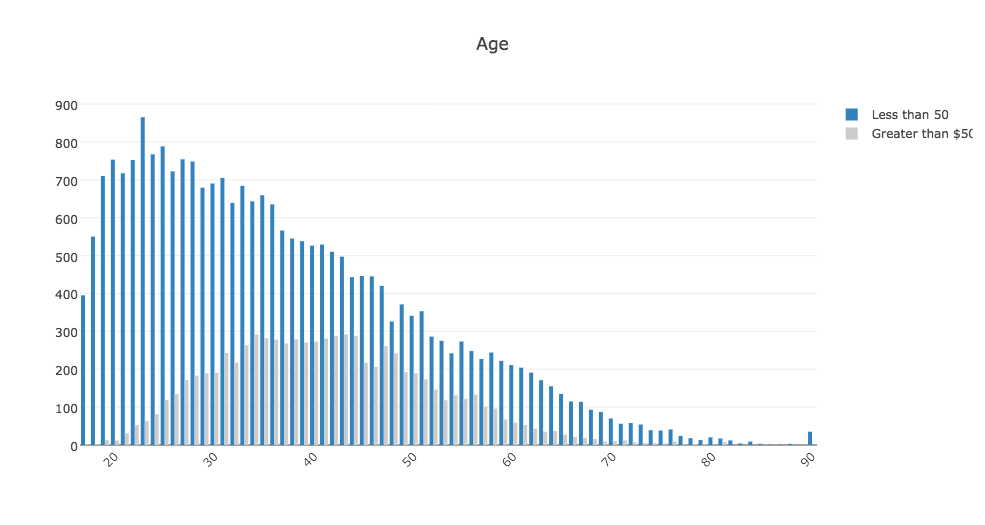

In [21]:
from IPython.display import Image 
Image(filename="images/incomebar.png")

Below we will create an index and Pandas series for the "Age" variable, which we will then use to generate and display a heat map as an additional visualization.

In [22]:
# Heat Map for Age 
# Index is the age
# Create a Pandas Series 
 
dfageHeatmap1 = pd.DataFrame()
dfageHeatmap2 = pd.DataFrame()
 
dfageHeatmap1['<50K'] = Y1
dfageHeatmap2['>=50K'] = Y2
dfageHeatMap = pd.concat([dfageHeatmap1,dfageHeatmap2], ignore_index=True, axis=1)
dfageHeatMap.index = X
dfageHeatMap.columns = ['<50K','>=50K']

dfageHeatMap['>=50K'].fillna('0',inplace=True)

# Do the Heat map 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
 
data = [go.Heatmap(   x= X, y= dfageHeatMap.columns , z=dfageHeatMap.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap',title="Heatmap")


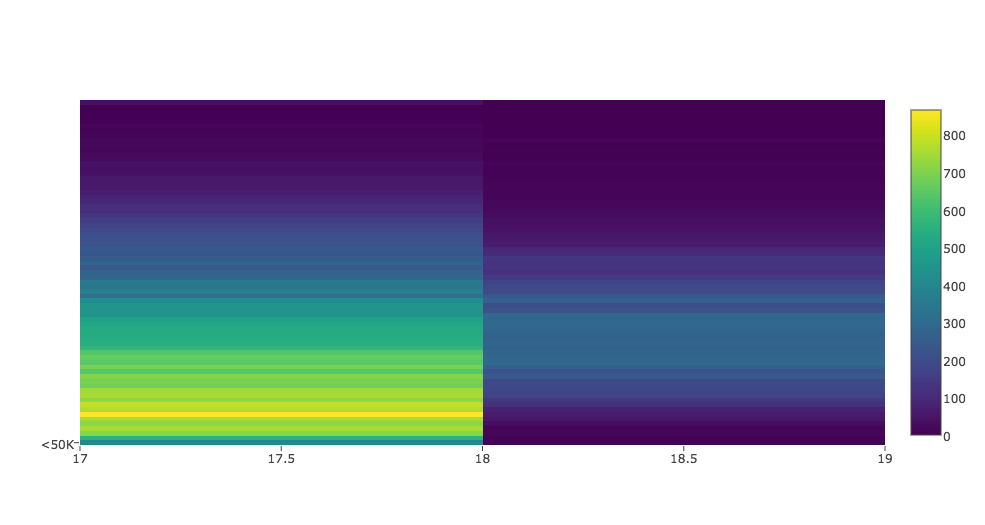

In [23]:
from IPython.display import Image 
Image(filename="images/incomeheat.png")

In [24]:
dfageHeatMap.columns

Index([u'<50K', u'>=50K'], dtype='object')

Here we will look at another heat map comparing the number of years of education, the marital status, and income.

In [25]:
# Get education-num  and get marital-status 

dfedubelow50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 0, ['education-num','targetfinal']])
#dfabove50K = dfincome.loc[dfincome.targetfinal == '1', 'age']
dfeduabove50K = pd.DataFrame(dfincome.loc[dfincome.targetfinal == 1, ['education-num','targetfinal']])

dfedubelow50K['COUNTER'] = 1
dfeduabove50K['COUNTER'] = 1
dfedubelow50K =  dfedubelow50K.groupby('education-num')['COUNTER'].count() 
dfeduabove50K = dfeduabove50K.groupby('education-num')['COUNTER'].count()

In [26]:
X = []
Y1 = []
for row in dfedubelow50K.iteritems():
    Y1.append(row[1])
    X.append(row[0])
Y2 = []
for row in dfeduabove50K.iteritems():
    Y2.append(row[1])

In [27]:
import plotly 
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='murparthjob', api_key='jj1ghd04s5')

trace0 = go.Bar(
    x=X,
    y=Y1,
    name='Less than 50',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=X,
    y=Y2,
    name='Greater than $50',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    title='Number of years of Education',
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~murparthjob/0 or inside your plot.ly account where it is named 'angled-text-bar'


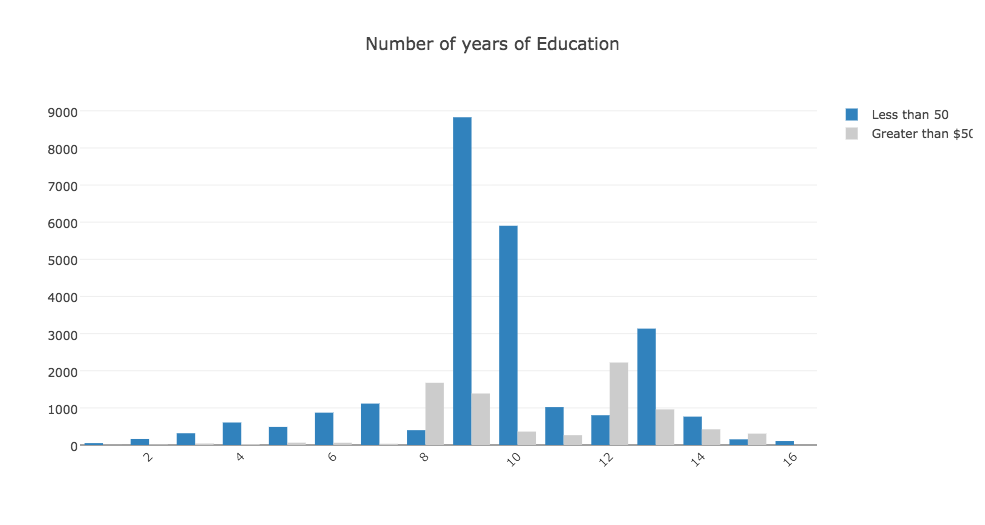

In [28]:
from IPython.display import Image 
Image(filename="images/bared.png")

Here is another heatmap comparing those three variables described above:  income, marital-status, and years of education.

In [29]:
dfeduHeatmap1 = pd.DataFrame()
dfeduHeatmap2 = pd.DataFrame()
 
dfeduHeatmap1['<50K'] = Y1
dfeduHeatmap2['>=50K'] = Y2
dfeduHeatMap = pd.concat([dfeduHeatmap1,dfeduHeatmap2], ignore_index=True, axis=1)
dfeduHeatMap.index = X
dfeduHeatMap.columns = ['<50K','>=50K']

dfeduHeatMap['>=50K'].fillna('0',inplace=True)

 # Do the Heat map 
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd
 
data = [go.Heatmap(   x= X, y= dfeduHeatMap.columns , z=dfeduHeatMap.values.tolist(), colorscale='Viridis')]

py.iplot(data, filename='pandas-heatmap',title="Heatmap")

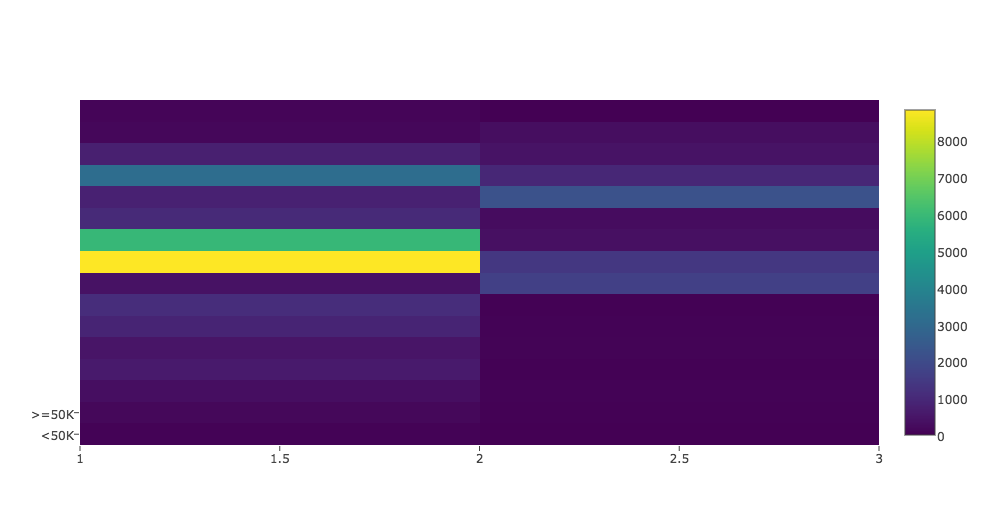

In [30]:
from IPython.display import Image 
Image(filename="images/heated.png")

# Modeling and Evaluation (50 points total)  

<font color='blue'>Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results.  </font>

• Option A: Cluster Analysis
• Perform cluster analysis using several clustering methods
• How did you determine a suitable number of clusters for each method?
• Use internal and/or external validation measures to describe and compare the
clusterings and the clusters (some visual methods would be good).
• Describe your results. What findings are the most interesting and why?
  
• Option B: Association Rule Mining
• Create frequent itemsets and association rules.
• Use tables/visualization to discuss the found results.
• Use several measure for evaluating how interesting different rules are.
• Describe your results. What findings are the most compelling and why?
  
• Option C: Collaborative Filtering
• Create user-item matrices or item-item matrices using collaborative filtering
• Determine performance of the recommendations using different performance measures
and explain what each measure
• Use tables/visualization to discuss the found results. Explain each visualization in detail.
• Describe your results. What findings are the most compelling and why?</font

### Obtaining a baseline accuracy using a Random Forest classifier with no clustering  
  
  In order to properly determine the change in accuracy obtained by the various clustering techniques used we should first obtain a baseline accuracy score that can be obtained without any clustering being done on the data.  In order to obtain this baseline value we will run a stratified 10 fold cross validation on a Random Forest classifier before any clustering has been done to the data.  We have chosen to use 10 fold cross validation as it ensures that all data is included at least once in the test set, and we have chosen to make it stratified to account for the discrepancy in the dataset responses between those that earn less than 50,000 USD a year and those that earn more.  
    
  Please note that the approach we are using and the code to implement that approach are both heavily based upon workbook 9 "clustering and discretization" created by Eric Larson.

In [31]:
# Here we set the one-hot encoded "dummy" variables as the X and the original target variable (where 0 is <50K and 1 is >=50K) will
# become our y.  We also initialize a y_hat variable.
X = df_dummies
y = np.array(target)
y_hat = np.zeros(len(target)) 

# This creates our K fold model with 10 folds.
cv = StratifiedKFold(y, n_folds=10) 

In [32]:
# Code in this cell based on workbook 9 "clustering and discretization" created by Eric Larson.

clf = RandomForestClassifier(n_estimators=150,random_state=1)

acc = cross_val_score(clf,X,y=y,cv=cv)

print( "Baseline accuracy and standard deviation= ", acc.mean()*100, "+-", acc.std()*100)

('Baseline accuracy and standard deviation= ', 84.63808342492716, '+-', 0.72477463666758168)


So now we have a baseline accuracy of 84.64% and a standard deviation of 0.72.  How well our clustering techniques will be judged upon how they can either increase that accuracy score, decrease the standard deviation, or both.  
  
  For our first clustering attempt, we will see if clustering two of the explanatory variables that are suspected to be correlated will improve the accuracy of the classification task.  It is suspected that age and hours-per-week may be correlated, with an older workforce working fewer hours.  We will investigate this suspected correlation to see if clustering is worthwhile.

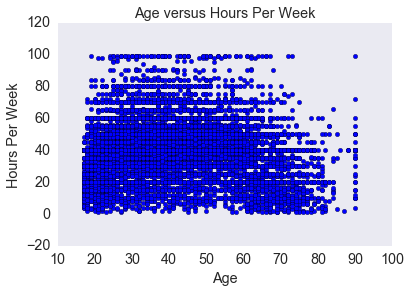

In [33]:
# Code in this cell based on workbook 9 "clustering and discretization" created by Eric Larson.

sns.set_palette("Set1", 8, .75)

%matplotlib inline
X1 = df_dummies[['hours-per-week','age']].values

plt.scatter(X1[:, 1], X1[:, 0], 
             s=20)
plt.xlabel('Age'), plt.ylabel('Hours Per Week')
plt.grid()
plt.title('Age versus Hours Per Week')
plt.show()

In the plot above we see that while there is the expected effect of older workers working fewer hours, the effect is not very pronounced and there are not clear and obvious clusters that could be formed from the two.  Because there is not a strong and obvious correlation we are not inclined to pursue clustering these two variables for now.  
  
  Trying again, let's instead see if we observe an obvious correlation between age and reported capital gains.  It seems reasonable to assume that older workers are more likely to have capital gains than younger workers, and worth exploring.  We will do so using the same code and graph as before, only with different variables chosen.

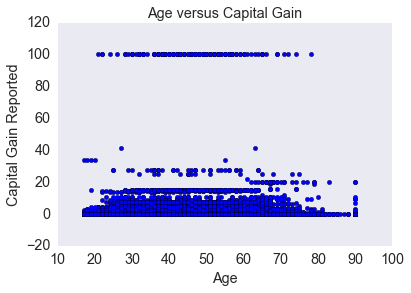

In [34]:
# Code in this cell based on workbook 9 "clustering and discretization" created by Eric Larson.

sns.set_palette("Set1", 8, .75)

%matplotlib inline
X1 = df_dummies[['capital-gain','age']].values

plt.scatter(X1[:, 1], X1[:, 0], 
             s=20)
plt.xlabel('Age'), plt.ylabel('Capital Gain Reported')
plt.grid()
plt.title('Age versus Capital Gain')
plt.show()

This seems more promising a candidate for clustering.  There is a string of respondents that report the maximum capital gain, creating a line at the top of the graph.  That line could very well become its own cluster, as well as perhaps a few other clusters in the non-maximized capital gain area.  Seeing how the accuracy is changed with this clustering will be interesting, so we will pursue the clustering now as our next step.  We will first assume 6 clusters becauase looking at the plot I can imagine about 6 clusters being there, but will play around with different values afterwards to ensure we choose the value that brings the most benefit to our accuracy.

In [35]:
# Code in this cell is based upon workbook 9 "clustering and discretization" created by Eric Larson.

X1 = df_dummies[['capital-gain','age']].values
cls = KMeans(n_clusters=6, init='k-means++',random_state=1)
cls.fit(X1)
ageCapGainFeature = cls.labels_ 

y = np.array(target)
X = df_dummies
X = np.column_stack((X,pd.get_dummies(ageCapGainFeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print("Average accuracy after KMeans clustering for Age and Capital Gain = ", acc.mean()*100, "+-", acc.std()*100)

('Average accuracy after KMeans clustering for Age and Capital Gain = ', 84.684152220995941, '+-', 0.72464578863960338)


We see that clustering using KMeans with 6 clusters brought an almost imperceptably small improvement.  We went from a baseline accuracy of 84.63 to 84.68, and the standard deviation reduced from 0.7247 to 0.7246.  Let's try using fewer clusters and see if that changes our results.  Below we will try with 3 clusters, and then try once more using only 2 clusters to see what we find.

In [36]:
# Code in this cell is based upon workbook 9 "clustering and discretization" created by Eric Larson.

X1 = df_dummies[['capital-gain','age']].values
cls = KMeans(n_clusters=3, init='k-means++',random_state=1)
cls.fit(X1)
ageCapGainFeature = cls.labels_ 

y = np.array(target)
X = df_dummies
X = np.column_stack((X,pd.get_dummies(ageCapGainFeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print("Average accuracy after KMeans clustering for Age and Capital Gain (3 clusters)= ", acc.mean()*100, "+-", acc.std()*100)

('Average accuracy after KMeans clustering for Age and Capital Gain (3 clusters)= ', 84.843848893971725, '+-', 0.6236009645982088)


In [37]:
# Code in this cell is based upon workbook 9 "clustering and discretization" created by Eric Larson.

X1 = df_dummies[['capital-gain','age']].values
cls = KMeans(n_clusters=2, init='k-means++',random_state=1)
cls.fit(X1)
ageCapGainFeature = cls.labels_ 

y = np.array(target)
X = df_dummies
X = np.column_stack((X,pd.get_dummies(ageCapGainFeature)))

acc = cross_val_score(clf,X,y=y,cv=cv)

print("Average accuracy after KMeans clustering for Age and Capital Gain (2 clusters)= ", acc.mean()*100, "+-", acc.std()*100)

('Average accuracy after KMeans clustering for Age and Capital Gain (2 clusters)= ', 84.65958219642593, '+-', 0.68947029479191446)


It seems that out of the three options tried, three clusters won out as the very best KMeans clustering option with an accuracy of 84.84% and a standard deviation of 0.62.  Next, let's see if agglomerative clustering does any better.

In [38]:
# Code in this cell is based upon workbook 9 "clustering and discretization" created by Eric Larson.

X1 = df_dummies[['capital-gain','age']].values

cls_fam = AgglomerativeClustering(n_clusters=3, linkage='ward')
cls_fam.fit(X1)
newfeature_fam = cls_fam.labels_ 

y = np.array(target)
X = df_dummies
X = np.column_stack((X,pd.get_dummies(newfeature_fam))) 

acc = cross_val_score(clf,X,y=y,cv=cv)
print("Accuracy for agglomerative clustering = ", acc.mean()*100, "+-", acc.std()*100)

('Accuracy for agglomerative clustering = ', 84.75785380797663, '+-', 0.69380321764645914)


While my computer crashed whenever I tried doing anything more complex than just a single set of options, the accuracy obtained with agglomerative clustering did not seem to impress.  An accuracy of 84.76% and a standard deviation of 0.69 is not as good as what we got from KMeans.

In [39]:
# Code in this cell is based upon workbook 9 "clustering and discretization" created by Eric Larson.

cls_fam = DBSCAN(eps=0.15, min_samples=3,random_state=1)
cls_fam.fit(X1)
newfeature_fam = cls_fam.labels_ 

y = np.array(target)
X = df_dummies
X = np.column_stack((X,pd.get_dummies(newfeature_fam))) 

acc = cross_val_score(clf,X,y=y,cv=cv)

print("Accuracy for DBScan clustering = ", acc.mean()*100, "+-", acc.std()*100)

/Users/p00012387/anaconda/lib/python2.7/site-packages/sklearn/cluster/dbscan_.py:116: DeprecationWarning:

The parameter random_state is deprecated in 0.16 and will be removed in version 0.18. DBSCAN is deterministic except for rare border cases.



('Accuracy for DBScan clustering = ', 85.111059226809914, '+-', 0.76319310014569686)


The results from DBScan, which again had some limited options based upon what my computer could run without crashing, ended up getting a higher accuracy score of 85.11%, but also a higher standard deviation of 0.76.  Therefore I cannot consider this to be as positive a result as what we saw with well-tuned KMeans.

/Users/p00012387/anaconda/lib/python2.7/site-packages/sklearn/cluster/dbscan_.py:116: DeprecationWarning:

The parameter random_state is deprecated in 0.16 and will be removed in version 0.18. DBSCAN is deterministic except for rare border cases.



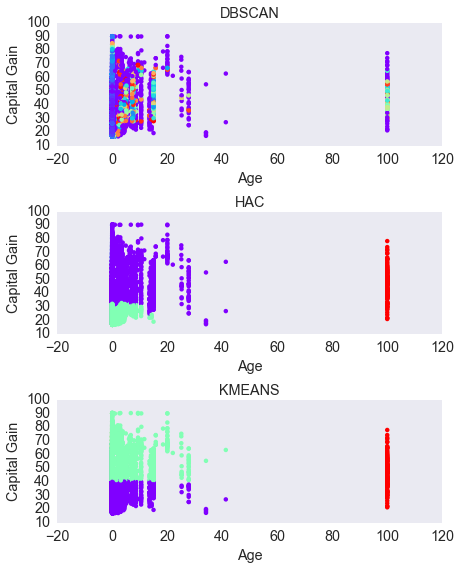

In [40]:
data = X1

cls = DBSCAN(eps=0.15, min_samples=3,random_state=1)
cls.fit(data)
dbs_labels = cls.labels_ 

cls = AgglomerativeClustering(n_clusters=3, linkage='ward')
cls.fit(data)
hac_labels = cls.labels_ 

cls = KMeans(n_clusters=3, random_state=1)
cls.fit(data)
kmn_labels = cls.labels_

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','HAC','KMEANS']

for i,l in enumerate([dbs_labels,hac_labels,kmn_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data[:, 0], data[:, 1]+np.random.random(data[:, 1].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('Age'), plt.ylabel('Capital Gain')
    plt.grid()
    plt.title(title[i])
    

plt.tight_layout()
plt.show()

In the visualization above we see how the KMeans clustering looked to be closer to the Agglomerative clustering, but both were quite far away from the results of the DBScan clustering.  I was a little bit surprised to see the clustering show up as it did in the KMeans, as I was expecting one of the green or purple clusters to look more vertical like the red cluster, but at the end of the day we still attained quite satisfactory accuracy and standard deviation scores.

# Deployment (10 points total)  
• Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?
• How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?
• How would your deploy your model for interested parties?
• What other data should be collected?
• How often would the model need to be updated, etc.?

This clustering model could feasibly be used to improve the accuracy of any prediction being made for predicting income level based upon a variety of factors.  In this way we feel that we did achieve our goals of improving the accuracy, as our previous best accuracy achieved without the benefit of clustering was 84.64% and a standard deviation of 0.72.  Through a well-tuned KMeans clustering model we were able to improve the predictive accuracy to 84.84% while lowering the standard deviation to 0.62.  
  
  We feel that this model would be very useful for any organization that has an interest in predicting income level.  These organizations could include groups of economists, social scientists, or legislators.  These parties would first run a standard predictive model on the data, then would add in our clustering model to improve the accuracy of their predictive model.  
    
  Any other data that is both a) highly predictive of an individuals income level and b) not very correlated with existing predictive variables should be gathered in order to improve the accuracy of the predictive models even further.  This model would need to be updated any time the frame of interest changed.  For example, if we were previously only investigating income levels for those born before 1980 and then started becoming interested in those born after 1981 then the model would have to be updated and perhaps further tuned to account for this additional information.

# Exceptional Work (10 points total)  

• You have free reign to provide additional analyses or combine analyses  
  
  For our exceptional work we decided to build a recommendation engine in addition to the clustering we have performed in the code above.

# Association Rule and Recommendation Engine
The recommendation engine is based on country purchases. The data set contains purchases by various countries from a company in the UK. The data set consists of StockCode, description, quantity, invoice Number and the country making the purchase. The system will determine the usage rules for a country and will also build a recommendation engine which can be used for existing countries and new customers ( country) based on the profile. 


# Data Set 
The Data Set was downloaded from UCI Machine learning repository (https://archive.ics.uci.edu/ml/datasets/Online+Retail)

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation. 
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. 
Description: Product (item) name. Nominal. 
Quantity: The quantities of each product (item) per transaction. Numeric.	
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated. 
UnitPrice: Unit price. Numeric, Product price per unit in sterling. 
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer. 
Country: Country name. Nominal, the name of the country where each customer resides.




# Loading the Data Set

In [1]:
#GraphLab 
# Use the data Recommendation Engine
# Do Clustering using Graph Lab
import graphlab as gl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

This non-commercial license of GraphLab Create for academic use is assigned to sjagarlamudi@mail.smu.edu and will expire on September 30, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1481507676.log


In [9]:
path = 'data'
filename = path + '/OnlineRetail.csv'
url = filename
sf = gl.SFrame.read_csv(url)

Finished parsing file /Users/p00012387/SMUMSDS2016/data/OnlineRetail.csv

Parsing completed. Parsed 100 lines in 0.713916 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,int,str,float,int,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unable to parse line "C557487,21877,HOME SWEET HOME MUG,-19,6/20/11 14:44,1.25,14796,United Kingdom"

Unable to parse line "C542787,85141,JARDIN ETCHED GLASS FRUITBOWL,-1,2/1/11 10:22,8.95,15864,United Kingdom"

Unable to parse line "C564320,22767,TRIPLE PHOTO FRAME CORNICE ,-1,8/24/11 13:20,9.95,16536,United Kingdom"

Unable to parse line "C576216,22804,PINK HANGING HEART T-LIGHT HOLDER,-3,11/14/11 12:56,2.95,12584,Italy"

Unable to parse line "C550009,M,Manual,-1,4/14/11 10:24,57.6,16422,United Kingdom"

Unable to parse line "C542787,21319,GLASS CHALICE GREEN  SMALL ,-1,2/1/11 10:22,1.65,15864,United Kingdom"

Unable to parse line "C576216,22720,SET OF 3 CAKE TINS PANTRY DESIGN ,-3,11/14/11 12:56,4.95,12584,Italy"

Unable to parse line "C550010,84950,ASSORTED COLOUR T-LIGHT HOLDER,-4,4/14/11 10:29,0.55,15299,United Kingdom"

Unable to parse line "C542787,21318,GLASS CHALICE BLUE SMALL ,-2,2/1/11 10:22,1.65,15864,United Kingdom"

Unable to parse line "C536379,D,Discount,-1,12/1/10 9:41,27.5,14527,United Kingdom"

Unable to parse line "C576216,21843,RED RETROSPOT CAKE STAND,-1,11/14/11 12:56,10.95,12584,Italy"

Unable to parse line "C550010,84856S,SMALL TAHITI BEACH BAG,-1,4/14/11 10:29,3.81,15299,United Kingdom"

Unable to parse line "C564331,POST,POSTAGE,-1,8/24/11 13:57,18,12569,Germany"

9291 lines failed to parse correctly

Finished parsing file /Users/p00012387/SMUMSDS2016/data/OnlineRetail.csv

Parsing completed. Parsed 532618 lines in 1.02738 secs.

In [10]:
path = 'data'
filename = path + '/OnlineRetail.csv'
url = filename
url

'data/OnlineRetail.csv'

# Snapshot of the data
The data was directly loaded into Turi dataframe 

In [11]:
sf

InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
536365,85123A,WHITE HANGING HEARTT-LIGHT HOLDER ...,6,12/1/10 8:26,2.55,17850,United Kingdom
536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,84406B,CREAM CUPID HEARTS COATHANGER ...,8,12/1/10 8:26,2.75,17850,United Kingdom
536365,84029G,KNITTED UNION FLAG HOTWATER BOTTLE ...,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,84029E,RED WOOLLY HOTTIE WHITEHEART. ...,6,12/1/10 8:26,3.39,17850,United Kingdom
536365,22752,SET 7 BABUSHKA NESTINGBOXES ...,2,12/1/10 8:26,7.65,17850,United Kingdom
536365,21730,GLASS STAR FROSTEDT-LIGHT HOLDER ...,6,12/1/10 8:26,4.25,17850,United Kingdom
536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850,United Kingdom
536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850,United Kingdom
536367,84879,ASSORTED COLOUR BIRDORNAMENT ...,32,12/1/10 8:34,1.69,13047,United Kingdom


In [12]:
# Create a train/test split
#train, test = sf.random_split(0.95)

# Create a FrequentPatternMiner
model = gl.frequent_pattern_mining.create(sf, 'Description',features=['InvoiceNo']
                 , min_length=4, max_patterns=500)


Indexing complete. Found 4195 unique items.

Preprocessing complete. Found 22061 unique transactions.

Building frequent pattern tree.

+-----------+----------------+------------+----------------------+------------------+

| Iteration | Num. Patterns  | Support    | Current Min Support  | Elapsed Time     |

+-----------+----------------+------------+----------------------+------------------+

| 0         | 0              | 2260       | 3                    | 128us            |

| 1         | 0              | 2092       | 3                    | 168us            |

| 2         | 0              | 1989       | 3                    | 213us            |

| 3         | 0              | 1686       | 3                    | 277us            |

| 4         | 1              | 1564       | 3                    | 360us            |

| 5         | 6              | 1455       | 3                    | 522us            |

| 6         | 22             | 1454       | 3                    | 878us            |

| 7         | 22             | 1385       | 3                    | 898us            |

| 8         | 58             | 1320       | 3                    | 1.563ms          |

| 9         | 143            | 1273       | 3                    | 3.136ms          |

| 10        | 294            | 1249       | 3                    | 6.094ms          |

| 11        | 500            | 1218       | 7                    | 12.946ms         |

| 12        | 500            | 1201       | 14                   | 18.749ms         |

| 13        | 500            | 1184       | 20                   | 25.567ms         |

| 14        | 500            | 1175       | 27                   | 33.985ms         |

| 15        | 500            | 1162       | 30                   | 39.885ms         |

| 16        | 500            | 1160       | 38                   | 50.305ms         |

| 17        | 500            | 1157       | 41                   | 56.625ms         |

| 18        | 500            | 1150       | 43                   | 62.109ms         |

| 19        | 500            | 1141       | 45                   | 68.961ms         |

| 20        | 500            | 1133       | 46                   | 72.784ms         |

| 21        | 500            | 1126       | 50                   | 83.405ms         |

| 22        | 500            | 1117       | 50                   | 83.795ms         |

| 23        | 500            | 1100       | 55                   | 97.088ms         |

| 24        | 500            | 1090       | 55                   | 101.398ms        |

| 25        | 500            | 1085       | 58                   | 110.843ms        |

| 26        | 500            | 1073       | 62                   | 120.348ms        |

| 27        | 500            | 1066       | 63                   | 128.708ms        |

| 28        | 500            | 1051       | 65                   | 139.02ms         |

| 29        | 500            | 1037       | 65                   | 144.985ms        |

| 30        | 500            | 1036       | 66                   | 158.016ms        |

| 31        | 500            | 1034       | 68                   | 168.877ms        |

| 32        | 500            | 1018       | 72                   | 188.692ms        |

| 33        | 500            | 1015       | 77                   | 203.701ms        |

| 34        | 500            | 994        | 80                   | 218.13ms         |

| 35        | 500            | 986        | 80                   | 222.981ms        |

| 36        | 500            | 980        | 80                   | 229.189ms        |

| 37        | 500            | 978        | 80                   | 235.693ms        |

| 38        | 500            | 971        | 82                   | 249.352ms        |

| 39        | 500            | 962        | 82                   | 254.506ms        |

| 40        | 500            | 955        | 82                   | 259.977ms        |

| 41        | 500            | 934        | 82                   | 269.519ms        |

| 42        | 500            | 933        | 82                   | 273.451ms        |

| 43        | 500            | 926        | 83                   | 284.616ms        |

| 44        | 500            | 926        | 83                   | 293.014ms        |

| 45        | 500            | 913        | 83                   | 297.97ms         |

| 46        | 500            | 906        | 83                   | 305.544ms        |

| 47        | 500            | 900        | 84                   | 315.272ms        |

| 48        | 500            | 882        | 84                   | 322.584ms        |

| 49        | 500            | 879        | 89                   | 345.09ms         |

| 50        | 500            | 879        | 90                   | 355.56ms         |

| 51        | 500            | 873        | 90                   | 363.123ms        |

| 52        | 500            | 871        | 90                   | 373.228ms        |

| 53        | 500            | 869        | 90                   | 374.191ms        |

| 54        | 500            | 865        | 90                   | 385.358ms        |

| 55        | 500            | 863        | 91                   | 398.776ms        |

| 56        | 500            | 858        | 93                   | 417.397ms        |

| 57        | 500            | 850        | 94                   | 422.401ms        |

| 58        | 500            | 849        | 94                   | 434.765ms        |

| 59        | 500            | 845        | 94                   | 450.109ms        |

| 60        | 500            | 835        | 94                   | 453.826ms        |

| 61        | 500            | 834        | 100                  | 478.85ms         |

| 62        | 500            | 828        | 100                  | 484.814ms        |

| 63        | 500            | 825        | 100                  | 494.387ms        |

| 64        | 500            | 820        | 101                  | 506.811ms        |

| 65        | 500            | 803        | 101                  | 509.855ms        |

| 66        | 500            | 799        | 101                  | 517.84ms         |

| 67        | 500            | 783        | 101                  | 525.087ms        |

| 68        | 500            | 782        | 101                  | 532.162ms        |

| 69        | 500            | 777        | 101                  | 533.482ms        |

| 70        | 500            | 772        | 101                  | 535.865ms        |

| 71        | 500            | 771        | 101                  | 541.613ms        |

| 72        | 500            | 766        | 101                  | 544.055ms        |

| 73        | 500            | 759        | 102                  | 554.623ms        |

| 74        | 500            | 758        | 102                  | 556.981ms        |

| 75        | 500            | 748        | 102                  | 565.78ms         |

| 76        | 500            | 743        | 102                  | 583.714ms        |

| 77        | 500            | 741        | 107                  | 609.28ms         |

| 78        | 500            | 740        | 107                  | 611.107ms        |

| 79        | 500            | 732        | 109                  | 618.713ms        |

| 80        | 500            | 728        | 109                  | 624.364ms        |

| 81        | 500            | 728        | 109                  | 627.726ms        |

| 82        | 500            | 723        | 109                  | 629.21ms         |

| 83        | 500            | 722        | 109                  | 630.806ms        |

| 84        | 500            | 716        | 116                  | 654.358ms        |

| 85        | 500            | 715        | 116                  | 660.149ms        |

| 86        | 500            | 711        | 116                  | 661.898ms        |

| 87        | 500            | 708        | 116                  | 667.486ms        |

| 88        | 500            | 707        | 121                  | 709.827ms        |

| 89        | 500            | 706        | 121                  | 713.452ms        |

| 90        | 500            | 705        | 121                  | 716.846ms        |

| 91        | 500            | 704        | 122                  | 726.444ms        |

| 92        | 500            | 697        | 122                  | 730.357ms        |

| 93        | 500            | 689        | 122                  | 731.599ms        |

| 94        | 500            | 688        | 122                  | 733.238ms        |

| 95        | 500            | 688        | 122                  | 738.707ms        |

| 96        | 500            | 685        | 122                  | 745.645ms        |

| 97        | 500            | 685        | 122                  | 746.872ms        |

| 98        | 500            | 682        | 122                  | 750.634ms        |

| 99        | 500            | 681        | 122                  | 755.536ms        |

| 100       | 500            | 677        | 122                  | 756.913ms        |

| 101       | 500            | 673        | 122                  | 758.525ms        |

| 102       | 500            | 673        | 122                  | 761.073ms        |

| 103       | 500            | 670        | 122                  | 769.673ms        |

| 104       | 500            | 670        | 122                  | 773.232ms        |

| 105       | 500            | 668        | 122                  | 775.988ms        |

| 106       | 500            | 663        | 123                  | 782.184ms        |

| 107       | 500            | 663        | 123                  | 786.671ms        |

| 108       | 500            | 662        | 123                  | 788.851ms        |

| 109       | 500            | 661        | 124                  | 797.506ms        |

| 110       | 500            | 657        | 124                  | 798.744ms        |

| 111       | 500            | 657        | 124                  | 801.905ms        |

| 112       | 500            | 654        | 124                  | 811.385ms        |

| 113       | 500            | 646        | 124                  | 813.258ms        |

| 114       | 500            | 643        | 124                  | 815.667ms        |

| 115       | 500            | 629        | 124                  | 817.978ms        |

| 116       | 500            | 629        | 124                  | 819.568ms        |

| 117       | 500            | 629        | 124                  | 824.216ms        |

| 118       | 500            | 623        | 124                  | 825.485ms        |

| 119       | 500            | 621        | 124                  | 827.041ms        |

| 120       | 500            | 618        | 124                  | 828.62ms         |

| 121       | 500            | 616        | 124                  | 831.689ms        |

| 122       | 500            | 616        | 124                  | 832.877ms        |

| 123       | 500            | 615        | 124                  | 834.453ms        |

| 124       | 500            | 610        | 124                  | 837.305ms        |

| 125       | 500            | 610        | 124                  | 838.848ms        |

| 126       | 500            | 609        | 124                  | 841.218ms        |

| 127       | 500            | 609        | 124                  | 844.167ms        |

| 128       | 500            | 608        | 124                  | 846.349ms        |

| 129       | 500            | 603        | 124                  | 848.609ms        |

| 130       | 500            | 603        | 124                  | 850.285ms        |

| 131       | 500            | 601        | 124                  | 853.559ms        |

| 132       | 500            | 601        | 124                  | 855.674ms        |

| 133       | 500            | 600        | 124                  | 858.825ms        |

| 134       | 500            | 595        | 124                  | 859.841ms        |

| 135       | 500            | 593        | 124                  | 867.102ms        |

| 136       | 500            | 589        | 124                  | 868.433ms        |

| 137       | 500            | 588        | 124                  | 870.076ms        |

| 138       | 500            | 587        | 124                  | 872.361ms        |

| 139       | 500            | 583        | 124                  | 877.458ms        |

| 140       | 500            | 581        | 125                  | 884.905ms        |

| 141       | 500            | 575        | 125                  | 887.563ms        |

| 142       | 500            | 575        | 125                  | 891.662ms        |

| 143       | 500            | 571        | 125                  | 894.265ms        |

| 144       | 500            | 570        | 125                  | 895.939ms        |

| 145       | 500            | 566        | 125                  | 897.494ms        |

| 146       | 500            | 562        | 125                  | 899.152ms        |

| 147       | 500            | 561        | 125                  | 900.673ms        |

| 148       | 500            | 561        | 125                  | 902.954ms        |

| 149       | 500            | 554        | 125                  | 904.186ms        |

| 150       | 500            | 552        | 125                  | 905.555ms        |

| 151       | 500            | 552        | 125                  | 906.988ms        |

| 152       | 500            | 552        | 125                  | 908.709ms        |

| 153       | 500            | 548        | 125                  | 909.94ms         |

| 154       | 500            | 547        | 125                  | 911.928ms        |

| 155       | 500            | 544        | 125                  | 913.224ms        |

| 156       | 500            | 544        | 125                  | 914.874ms        |

| 157       | 500            | 543        | 125                  | 919.01ms         |

| 158       | 500            | 541        | 125                  | 920.133ms        |

| 159       | 500            | 540        | 125                  | 923.542ms        |

| 160       | 500            | 539        | 125                  | 924.913ms        |

| 161       | 500            | 538        | 125                  | 926.02ms         |

| 162       | 500            | 538        | 125                  | 927.544ms        |

| 163       | 500            | 535        | 125                  | 930.552ms        |

| 164       | 500            | 535        | 125                  | 931.657ms        |

| 165       | 500            | 534        | 125                  | 932.908ms        |

| 166       | 500            | 533        | 125                  | 934.205ms        |

| 167       | 500            | 531        | 125                  | 935.683ms        |

| 168       | 500            | 530        | 125                  | 937.675ms        |

| 169       | 500            | 527        | 126                  | 955.545ms        |

| 170       | 500            | 527        | 126                  | 957.358ms        |

| 171       | 500            | 527        | 126                  | 959.977ms        |

| 172       | 500            | 524        | 126                  | 962.38ms         |

| 173       | 500            | 523        | 126                  | 963.536ms        |

| 174       | 500            | 522        | 128                  | 969.093ms        |

| 175       | 500            | 520        | 128                  | 970.527ms        |

| 176       | 500            | 519        | 128                  | 972.976ms        |

| 177       | 500            | 518        | 128                  | 973.943ms        |

| 178       | 500            | 518        | 128                  | 975.804ms        |

| 179       | 500            | 515        | 128                  | 977.983ms        |

| 180       | 500            | 514        | 128                  | 980.083ms        |

| 181       | 500            | 513        | 128                  | 982.196ms        |

| 182       | 500            | 512        | 128                  | 983.849ms        |

| 183       | 500            | 510        | 128                  | 985.526ms        |

| 184       | 500            | 509        | 128                  | 988.617ms        |

| 185       | 500            | 509        | 128                  | 989.642ms        |

| 186       | 500            | 507        | 128                  | 991.625ms        |

| 187       | 500            | 504        | 128                  | 994.012ms        |

| 188       | 500            | 502        | 128                  | 995.201ms        |

| 189       | 500            | 499        | 128                  | 996.322ms        |

| 190       | 500            | 496        | 128                  | 998.111ms        |

| 191       | 500            | 495        | 128                  | 999.647ms        |

| 192       | 500            | 493        | 128                  | 1.00s            |

| 193       | 500            | 492        | 128                  | 1.00s            |

| 194       | 500            | 490        | 128                  | 1.00s            |

| 195       | 500            | 485        | 128                  | 1.00s            |

| 196       | 500            | 484        | 128                  | 1.00s            |

| 197       | 500            | 482        | 128                  | 1.00s            |

| 198       | 500            | 481        | 128                  | 1.01s            |

| 199       | 500            | 480        | 128                  | 1.01s            |

| 200       | 500            | 479        | 128                  | 1.01s            |

| 201       | 500            | 478        | 128                  | 1.01s            |

| 202       | 500            | 477        | 128                  | 1.01s            |

| 203       | 500            | 476        | 128                  | 1.01s            |

| 204       | 500            | 476        | 128                  | 1.01s            |

| 205       | 500            | 476        | 128                  | 1.02s            |

| 206       | 500            | 475        | 128                  | 1.02s            |

| 207       | 500            | 475        | 128                  | 1.02s            |

| 208       | 500            | 472        | 128                  | 1.02s            |

| 209       | 500            | 470        | 128                  | 1.03s            |

| 210       | 500            | 470        | 128                  | 1.03s            |

| 211       | 500            | 469        | 128                  | 1.03s            |

| 212       | 500            | 468        | 128                  | 1.03s            |

| 213       | 500            | 468        | 128                  | 1.03s            |

| 214       | 500            | 468        | 128                  | 1.03s            |

| 215       | 500            | 467        | 128                  | 1.03s            |

| 216       | 500            | 467        | 128                  | 1.04s            |

| 217       | 500            | 465        | 128                  | 1.04s            |

| 218       | 500            | 464        | 128                  | 1.04s            |

| 219       | 500            | 462        | 128                  | 1.04s            |

| 220       | 500            | 460        | 128                  | 1.04s            |

| 221       | 500            | 459        | 128                  | 1.04s            |

| 222       | 500            | 459        | 128                  | 1.04s            |

| 223       | 500            | 457        | 128                  | 1.05s            |

| 224       | 500            | 456        | 128                  | 1.05s            |

| 225       | 500            | 454        | 128                  | 1.05s            |

| 226       | 500            | 453        | 128                  | 1.05s            |

| 227       | 500            | 451        | 128                  | 1.05s            |

| 228       | 500            | 451        | 128                  | 1.05s            |

| 229       | 500            | 450        | 128                  | 1.06s            |

| 230       | 500            | 450        | 128                  | 1.06s            |

| 231       | 500            | 449        | 128                  | 1.06s            |

| 232       | 500            | 449        | 128                  | 1.06s            |

| 233       | 500            | 449        | 128                  | 1.06s            |

| 234       | 500            | 448        | 128                  | 1.07s            |

| 235       | 500            | 448        | 128                  | 1.07s            |

| 236       | 500            | 447        | 128                  | 1.07s            |

| 237       | 500            | 447        | 128                  | 1.07s            |

| 238       | 500            | 447        | 128                  | 1.07s            |

| 239       | 500            | 446        | 128                  | 1.07s            |

| 240       | 500            | 445        | 128                  | 1.08s            |

| 241       | 500            | 445        | 128                  | 1.08s            |

| 242       | 500            | 445        | 128                  | 1.08s            |

| 243       | 500            | 445        | 128                  | 1.08s            |

| 244       | 500            | 444        | 128                  | 1.09s            |

| 245       | 500            | 443        | 128                  | 1.09s            |

| 246       | 500            | 443        | 128                  | 1.09s            |

| 247       | 500            | 441        | 128                  | 1.09s            |

| 248       | 500            | 437        | 128                  | 1.09s            |

| 249       | 500            | 437        | 128                  | 1.09s            |

| 250       | 500            | 437        | 128                  | 1.10s            |

| 251       | 500            | 436        | 128                  | 1.10s            |

| 252       | 500            | 436        | 128                  | 1.11s            |

| 253       | 500            | 436        | 128                  | 1.11s            |

| 254       | 500            | 433        | 128                  | 1.11s            |

| 255       | 500            | 433        | 128                  | 1.11s            |

| 256       | 500            | 430        | 128                  | 1.11s            |

| 257       | 500            | 429        | 128                  | 1.11s            |

| 258       | 500            | 429        | 128                  | 1.11s            |

| 259       | 500            | 428        | 128                  | 1.12s            |

| 260       | 500            | 428        | 128                  | 1.12s            |

| 261       | 500            | 427        | 128                  | 1.12s            |

| 262       | 500            | 426        | 128                  | 1.12s            |

| 263       | 500            | 425        | 128                  | 1.12s            |

| 264       | 500            | 425        | 128                  | 1.13s            |

| 265       | 500            | 423        | 128                  | 1.13s            |

| 266       | 500            | 423        | 128                  | 1.13s            |

| 267       | 500            | 422        | 128                  | 1.14s            |

| 268       | 500            | 422        | 128                  | 1.14s            |

| 269       | 500            | 418        | 128                  | 1.14s            |

| 270       | 500            | 416        | 128                  | 1.14s            |

| 271       | 500            | 416        | 128                  | 1.14s            |

| 272       | 500            | 415        | 128                  | 1.14s            |

| 273       | 500            | 415        | 128                  | 1.14s            |

| 274       | 500            | 415        | 128                  | 1.15s            |

| 275       | 500            | 415        | 128                  | 1.15s            |

| 276       | 500            | 413        | 128                  | 1.15s            |

| 277       | 500            | 413        | 128                  | 1.15s            |

| 278       | 500            | 412        | 128                  | 1.15s            |

| 279       | 500            | 412        | 128                  | 1.15s            |

| 280       | 500            | 412        | 128                  | 1.16s            |

| 281       | 500            | 412        | 128                  | 1.16s            |

| 282       | 500            | 411        | 128                  | 1.16s            |

| 283       | 500            | 411        | 128                  | 1.16s            |

| 284       | 500            | 410        | 128                  | 1.17s            |

| 285       | 500            | 409        | 128                  | 1.17s            |

| 286       | 500            | 409        | 128                  | 1.17s            |

| 287       | 500            | 408        | 128                  | 1.17s            |

| 288       | 500            | 407        | 128                  | 1.18s            |

| 289       | 500            | 407        | 128                  | 1.18s            |

| 290       | 500            | 405        | 128                  | 1.18s            |

| 291       | 500            | 405        | 128                  | 1.18s            |

| 292       | 500            | 405        | 128                  | 1.18s            |

| 293       | 500            | 403        | 128                  | 1.18s            |

| 294       | 500            | 403        | 128                  | 1.18s            |

| 295       | 500            | 402        | 128                  | 1.19s            |

| 296       | 500            | 402        | 128                  | 1.19s            |

| 297       | 500            | 401        | 128                  | 1.19s            |

| 298       | 500            | 399        | 128                  | 1.19s            |

| 299       | 500            | 398        | 128                  | 1.19s            |

| 300       | 500            | 398        | 128                  | 1.19s            |

| 301       | 500            | 397        | 128                  | 1.19s            |

| 302       | 500            | 397        | 128                  | 1.20s            |

| 303       | 500            | 395        | 128                  | 1.20s            |

| 304       | 500            | 395        | 128                  | 1.20s            |

| 305       | 500            | 394        | 128                  | 1.20s            |

| 306       | 500            | 394        | 128                  | 1.20s            |

| 307       | 500            | 393        | 128                  | 1.21s            |

| 308       | 500            | 392        | 128                  | 1.21s            |

| 309       | 500            | 390        | 128                  | 1.21s            |

| 310       | 500            | 389        | 128                  | 1.21s            |

| 311       | 500            | 388        | 128                  | 1.21s            |

| 312       | 500            | 387        | 128                  | 1.21s            |

| 313       | 500            | 386        | 128                  | 1.21s            |

| 314       | 500            | 385        | 128                  | 1.22s            |

| 315       | 500            | 383        | 128                  | 1.22s            |

| 316       | 500            | 383        | 128                  | 1.22s            |

| 317       | 500            | 382        | 128                  | 1.22s            |

| 318       | 500            | 382        | 128                  | 1.22s            |

| 319       | 500            | 381        | 128                  | 1.22s            |

| 320       | 500            | 381        | 129                  | 1.22s            |

| 321       | 500            | 380        | 129                  | 1.23s            |

| 322       | 500            | 380        | 129                  | 1.23s            |

| 323       | 500            | 380        | 129                  | 1.23s            |

| 324       | 500            | 379        | 129                  | 1.23s            |

| 325       | 500            | 378        | 129                  | 1.23s            |

| 326       | 500            | 378        | 129                  | 1.23s            |

| 327       | 500            | 378        | 129                  | 1.23s            |

| 328       | 500            | 377        | 129                  | 1.24s            |

| 329       | 500            | 377        | 129                  | 1.24s            |

| 330       | 500            | 376        | 129                  | 1.24s            |

| 331       | 500            | 376        | 129                  | 1.24s            |

| 332       | 500            | 375        | 129                  | 1.24s            |

| 333       | 500            | 375        | 129                  | 1.24s            |

| 334       | 500            | 375        | 129                  | 1.24s            |

| 335       | 500            | 375        | 129                  | 1.24s            |

| 336       | 500            | 375        | 129                  | 1.25s            |

| 337       | 500            | 374        | 129                  | 1.25s            |

| 338       | 500            | 373        | 129                  | 1.25s            |

| 339       | 500            | 373        | 129                  | 1.25s            |

| 340       | 500            | 373        | 129                  | 1.25s            |

| 341       | 500            | 372        | 129                  | 1.25s            |

| 342       | 500            | 372        | 129                  | 1.26s            |

| 343       | 500            | 372        | 129                  | 1.26s            |

| 344       | 500            | 370        | 129                  | 1.26s            |

| 345       | 500            | 369        | 129                  | 1.26s            |

| 346       | 500            | 369        | 129                  | 1.26s            |

| 347       | 500            | 368        | 129                  | 1.26s            |

| 348       | 500            | 368        | 129                  | 1.26s            |

| 349       | 500            | 367        | 129                  | 1.26s            |

| 350       | 500            | 366        | 129                  | 1.27s            |

| 351       | 500            | 365        | 129                  | 1.27s            |

| 352       | 500            | 365        | 129                  | 1.27s            |

| 353       | 500            | 365        | 129                  | 1.27s            |

| 354       | 500            | 365        | 129                  | 1.27s            |

| 355       | 500            | 364        | 129                  | 1.27s            |

| 356       | 500            | 363        | 129                  | 1.28s            |

| 357       | 500            | 362        | 129                  | 1.28s            |

| 358       | 500            | 362        | 129                  | 1.28s            |

| 359       | 500            | 362        | 129                  | 1.28s            |

| 360       | 500            | 361        | 129                  | 1.28s            |

| 361       | 500            | 361        | 129                  | 1.28s            |

| 362       | 500            | 360        | 129                  | 1.28s            |

| 363       | 500            | 360        | 129                  | 1.29s            |

| 364       | 500            | 359        | 129                  | 1.29s            |

| 365       | 500            | 359        | 129                  | 1.29s            |

| 366       | 500            | 359        | 129                  | 1.29s            |

| 367       | 500            | 358        | 129                  | 1.29s            |

| 368       | 500            | 358        | 129                  | 1.29s            |

| 369       | 500            | 358        | 129                  | 1.29s            |

| 370       | 500            | 357        | 129                  | 1.30s            |

| 371       | 500            | 356        | 129                  | 1.30s            |

| 372       | 500            | 356        | 129                  | 1.30s            |

| 373       | 500            | 355        | 129                  | 1.30s            |

| 374       | 500            | 355        | 129                  | 1.30s            |

| 375       | 500            | 354        | 129                  | 1.30s            |

| 376       | 500            | 354        | 129                  | 1.30s            |

| 377       | 500            | 354        | 129                  | 1.31s            |

| 378       | 500            | 353        | 129                  | 1.31s            |

| 379       | 500            | 352        | 129                  | 1.31s            |

| 380       | 500            | 352        | 129                  | 1.31s            |

| 381       | 500            | 351        | 129                  | 1.31s            |

| 382       | 500            | 350        | 129                  | 1.31s            |

| 383       | 500            | 349        | 129                  | 1.31s            |

| 384       | 500            | 348        | 129                  | 1.32s            |

| 385       | 500            | 348        | 129                  | 1.32s            |

| 386       | 500            | 348        | 129                  | 1.32s            |

| 387       | 500            | 347        | 129                  | 1.32s            |

| 388       | 500            | 347        | 129                  | 1.32s            |

| 389       | 500            | 346        | 129                  | 1.32s            |

| 390       | 500            | 345        | 129                  | 1.32s            |

| 391       | 500            | 345        | 129                  | 1.32s            |

| 392       | 500            | 345        | 129                  | 1.33s            |

| 393       | 500            | 345        | 129                  | 1.33s            |

| 394       | 500            | 344        | 129                  | 1.33s            |

| 395       | 500            | 344        | 129                  | 1.33s            |

| 396       | 500            | 344        | 129                  | 1.33s            |

| 397       | 500            | 344        | 129                  | 1.33s            |

| 398       | 500            | 343        | 129                  | 1.33s            |

| 399       | 500            | 342        | 129                  | 1.33s            |

| 400       | 500            | 340        | 129                  | 1.34s            |

| 401       | 500            | 340        | 129                  | 1.34s            |

| 402       | 500            | 339        | 129                  | 1.34s            |

| 403       | 500            | 338        | 129                  | 1.34s            |

| 404       | 500            | 338        | 129                  | 1.34s            |

| 405       | 500            | 337        | 129                  | 1.34s            |

| 406       | 500            | 336        | 129                  | 1.34s            |

| 407       | 500            | 336        | 129                  | 1.34s            |

| 408       | 500            | 335        | 129                  | 1.34s            |

| 409       | 500            | 335        | 129                  | 1.35s            |

| 410       | 500            | 334        | 129                  | 1.35s            |

| 411       | 500            | 333        | 129                  | 1.35s            |

| 412       | 500            | 333        | 129                  | 1.35s            |

| 413       | 500            | 333        | 129                  | 1.35s            |

| 414       | 500            | 332        | 129                  | 1.35s            |

| 415       | 500            | 331        | 129                  | 1.35s            |

| 416       | 500            | 331        | 129                  | 1.35s            |

| 417       | 500            | 330        | 129                  | 1.36s            |

| 418       | 500            | 329        | 129                  | 1.36s            |

| 419       | 500            | 328        | 129                  | 1.36s            |

| 420       | 500            | 328        | 129                  | 1.36s            |

| 421       | 500            | 327        | 129                  | 1.36s            |

| 422       | 500            | 326        | 129                  | 1.36s            |

| 423       | 500            | 326        | 129                  | 1.36s            |

| 424       | 500            | 325        | 129                  | 1.37s            |

| 425       | 500            | 325        | 129                  | 1.37s            |

| 426       | 500            | 325        | 129                  | 1.37s            |

| 427       | 500            | 325        | 129                  | 1.37s            |

| 428       | 500            | 325        | 129                  | 1.37s            |

| 429       | 500            | 323        | 129                  | 1.37s            |

| 430       | 500            | 323        | 129                  | 1.37s            |

| 431       | 500            | 322        | 129                  | 1.37s            |

| 432       | 500            | 322        | 129                  | 1.38s            |

| 433       | 500            | 322        | 129                  | 1.38s            |

| 434       | 500            | 321        | 129                  | 1.38s            |

| 435       | 500            | 321        | 129                  | 1.38s            |

| 436       | 500            | 319        | 129                  | 1.38s            |

| 437       | 500            | 318        | 129                  | 1.38s            |

| 438       | 500            | 318        | 129                  | 1.39s            |

| 439       | 500            | 318        | 129                  | 1.39s            |

| 440       | 500            | 317        | 129                  | 1.39s            |

| 441       | 500            | 317        | 129                  | 1.39s            |

| 442       | 500            | 317        | 129                  | 1.39s            |

| 443       | 500            | 317        | 129                  | 1.39s            |

| 444       | 500            | 317        | 129                  | 1.39s            |

| 445       | 500            | 316        | 129                  | 1.40s            |

| 446       | 500            | 315        | 129                  | 1.40s            |

| 447       | 500            | 314        | 129                  | 1.40s            |

| 448       | 500            | 313        | 129                  | 1.40s            |

| 449       | 500            | 313        | 129                  | 1.40s            |

| 450       | 500            | 313        | 129                  | 1.41s            |

| 451       | 500            | 312        | 129                  | 1.41s            |

| 452       | 500            | 311        | 129                  | 1.41s            |

| 453       | 500            | 311        | 129                  | 1.41s            |

| 454       | 500            | 309        | 129                  | 1.41s            |

| 455       | 500            | 309        | 129                  | 1.41s            |

| 456       | 500            | 309        | 129                  | 1.42s            |

| 457       | 500            | 307        | 129                  | 1.42s            |

| 458       | 500            | 307        | 129                  | 1.42s            |

| 459       | 500            | 306        | 129                  | 1.42s            |

| 460       | 500            | 305        | 129                  | 1.42s            |

| 461       | 500            | 305        | 129                  | 1.42s            |

| 462       | 500            | 305        | 129                  | 1.43s            |

| 463       | 500            | 305        | 129                  | 1.43s            |

| 464       | 500            | 305        | 129                  | 1.43s            |

| 465       | 500            | 304        | 129                  | 1.43s            |

| 466       | 500            | 304        | 129                  | 1.43s            |

| 467       | 500            | 303        | 129                  | 1.43s            |

| 468       | 500            | 302        | 129                  | 1.44s            |

| 469       | 500            | 301        | 129                  | 1.44s            |

| 470       | 500            | 301        | 129                  | 1.44s            |

| 471       | 500            | 301        | 129                  | 1.44s            |

| 472       | 500            | 300        | 129                  | 1.44s            |

| 473       | 500            | 299        | 129                  | 1.44s            |

| 474       | 500            | 299        | 129                  | 1.44s            |

| 475       | 500            | 299        | 129                  | 1.44s            |

| 476       | 500            | 299        | 129                  | 1.45s            |

| 477       | 500            | 298        | 129                  | 1.45s            |

| 478       | 500            | 297        | 129                  | 1.45s            |

| 479       | 500            | 297        | 129                  | 1.45s            |

| 480       | 500            | 297        | 129                  | 1.45s            |

| 481       | 500            | 297        | 129                  | 1.45s            |

| 482       | 500            | 296        | 129                  | 1.45s            |

| 483       | 500            | 295        | 129                  | 1.46s            |

| 484       | 500            | 295        | 129                  | 1.46s            |

| 485       | 500            | 295        | 129                  | 1.46s            |

| 486       | 500            | 294        | 129                  | 1.46s            |

| 487       | 500            | 294        | 129                  | 1.46s            |

| 488       | 500            | 293        | 129                  | 1.46s            |

| 489       | 500            | 293        | 129                  | 1.46s            |

| 490       | 500            | 292        | 129                  | 1.47s            |

| 491       | 500            | 292        | 129                  | 1.47s            |

| 492       | 500            | 291        | 129                  | 1.47s            |

| 493       | 500            | 291        | 129                  | 1.47s            |

| 494       | 500            | 291        | 129                  | 1.47s            |

| 495       | 500            | 291        | 129                  | 1.47s            |

| 496       | 500            | 290        | 129                  | 1.47s            |

| 497       | 500            | 290        | 129                  | 1.47s            |

| 498       | 500            | 290        | 129                  | 1.48s            |

| 499       | 500            | 290        | 129                  | 1.48s            |

| 500       | 500            | 290        | 129                  | 1.48s            |

| 501       | 500            | 290        | 129                  | 1.48s            |

| 502       | 500            | 289        | 129                  | 1.48s            |

| 503       | 500            | 289        | 129                  | 1.48s            |

| 504       | 500            | 289        | 129                  | 1.48s            |

| 505       | 500            | 288        | 129                  | 1.49s            |

| 506       | 500            | 287        | 129                  | 1.49s            |

| 507       | 500            | 287        | 129                  | 1.49s            |

| 508       | 500            | 287        | 129                  | 1.49s            |

| 509       | 500            | 287        | 129                  | 1.49s            |

| 510       | 500            | 286        | 129                  | 1.49s            |

| 511       | 500            | 286        | 129                  | 1.49s            |

| 512       | 500            | 286        | 129                  | 1.50s            |

| 513       | 500            | 285        | 129                  | 1.50s            |

| 514       | 500            | 284        | 129                  | 1.50s            |

| 515       | 500            | 284        | 129                  | 1.50s            |

| 516       | 500            | 282        | 129                  | 1.50s            |

| 517       | 500            | 282        | 129                  | 1.50s            |

| 518       | 500            | 281        | 129                  | 1.50s            |

| 519       | 500            | 280        | 129                  | 1.50s            |

| 520       | 500            | 280        | 129                  | 1.51s            |

| 521       | 500            | 279        | 129                  | 1.51s            |

| 522       | 500            | 279        | 129                  | 1.51s            |

| 523       | 500            | 278        | 129                  | 1.51s            |

| 524       | 500            | 278        | 129                  | 1.51s            |

| 525       | 500            | 278        | 129                  | 1.51s            |

| 526       | 500            | 278        | 129                  | 1.51s            |

| 527       | 500            | 278        | 129                  | 1.51s            |

| 528       | 500            | 277        | 129                  | 1.52s            |

| 529       | 500            | 277        | 129                  | 1.52s            |

| 530       | 500            | 277        | 129                  | 1.52s            |

| 531       | 500            | 276        | 129                  | 1.52s            |

| 532       | 500            | 276        | 129                  | 1.52s            |

| 533       | 500            | 275        | 129                  | 1.52s            |

| 534       | 500            | 275        | 129                  | 1.52s            |

| 535       | 500            | 275        | 129                  | 1.52s            |

| 536       | 500            | 274        | 129                  | 1.53s            |

| 537       | 500            | 274        | 129                  | 1.53s            |

| 538       | 500            | 274        | 129                  | 1.53s            |

| 539       | 500            | 274        | 129                  | 1.53s            |

| 540       | 500            | 274        | 129                  | 1.53s            |

| 541       | 500            | 273        | 129                  | 1.53s            |

| 542       | 500            | 272        | 129                  | 1.53s            |

| 543       | 500            | 272        | 129                  | 1.53s            |

| 544       | 500            | 271        | 129                  | 1.54s            |

| 545       | 500            | 271        | 129                  | 1.54s            |

| 546       | 500            | 271        | 129                  | 1.54s            |

| 547       | 500            | 270        | 129                  | 1.54s            |

| 548       | 500            | 270        | 129                  | 1.54s            |

| 549       | 500            | 270        | 129                  | 1.54s            |

| 550       | 500            | 269        | 129                  | 1.54s            |

| 551       | 500            | 268        | 129                  | 1.55s            |

| 552       | 500            | 268        | 129                  | 1.55s            |

| 553       | 500            | 267        | 129                  | 1.55s            |

| 554       | 500            | 267        | 129                  | 1.55s            |

| 555       | 500            | 267        | 129                  | 1.55s            |

| 556       | 500            | 267        | 129                  | 1.55s            |

| 557       | 500            | 266        | 129                  | 1.55s            |

| 558       | 500            | 266        | 129                  | 1.56s            |

| 559       | 500            | 266        | 129                  | 1.56s            |

| 560       | 500            | 266        | 129                  | 1.56s            |

| 561       | 500            | 266        | 129                  | 1.56s            |

| 562       | 500            | 265        | 129                  | 1.56s            |

| 563       | 500            | 264        | 129                  | 1.56s            |

| 564       | 500            | 264        | 129                  | 1.56s            |

| 565       | 500            | 263        | 129                  | 1.56s            |

| 566       | 500            | 262        | 129                  | 1.57s            |

| 567       | 500            | 262        | 129                  | 1.57s            |

| 568       | 500            | 262        | 129                  | 1.57s            |

| 569       | 500            | 262        | 129                  | 1.57s            |

| 570       | 500            | 262        | 129                  | 1.57s            |

| 571       | 500            | 261        | 129                  | 1.57s            |

| 572       | 500            | 261        | 129                  | 1.57s            |

| 573       | 500            | 261        | 129                  | 1.57s            |

| 574       | 500            | 261        | 129                  | 1.58s            |

| 575       | 500            | 261        | 129                  | 1.58s            |

| 576       | 500            | 261        | 129                  | 1.58s            |

| 577       | 500            | 260        | 129                  | 1.58s            |

| 578       | 500            | 259        | 129                  | 1.58s            |

| 579       | 500            | 259        | 129                  | 1.58s            |

| 580       | 500            | 258        | 129                  | 1.58s            |

| 581       | 500            | 258        | 129                  | 1.58s            |

| 582       | 500            | 257        | 129                  | 1.59s            |

| 583       | 500            | 257        | 129                  | 1.59s            |

| 584       | 500            | 257        | 129                  | 1.59s            |

| 585       | 500            | 257        | 129                  | 1.59s            |

| 586       | 500            | 256        | 129                  | 1.59s            |

| 587       | 500            | 256        | 129                  | 1.59s            |

| 588       | 500            | 256        | 129                  | 1.59s            |

| 589       | 500            | 255        | 129                  | 1.59s            |

| 590       | 500            | 255        | 129                  | 1.60s            |

| 591       | 500            | 255        | 129                  | 1.60s            |

| 592       | 500            | 255        | 129                  | 1.60s            |

| 593       | 500            | 255        | 129                  | 1.60s            |

| 594       | 500            | 255        | 129                  | 1.60s            |

| 595       | 500            | 254        | 129                  | 1.60s            |

| 596       | 500            | 254        | 129                  | 1.61s            |

| 597       | 500            | 252        | 129                  | 1.61s            |

| 598       | 500            | 252        | 129                  | 1.61s            |

| 599       | 500            | 252        | 129                  | 1.61s            |

| 600       | 500            | 251        | 129                  | 1.61s            |

| 601       | 500            | 251        | 129                  | 1.61s            |

| 602       | 500            | 251        | 129                  | 1.61s            |

| 603       | 500            | 250        | 129                  | 1.61s            |

| 604       | 500            | 250        | 129                  | 1.62s            |

| 605       | 500            | 249        | 129                  | 1.62s            |

| 606       | 500            | 248        | 129                  | 1.62s            |

| 607       | 500            | 248        | 129                  | 1.62s            |

| 608       | 500            | 248        | 129                  | 1.62s            |

| 609       | 500            | 248        | 129                  | 1.62s            |

| 610       | 500            | 247        | 129                  | 1.62s            |

| 611       | 500            | 247        | 129                  | 1.63s            |

| 612       | 500            | 247        | 129                  | 1.63s            |

| 613       | 500            | 246        | 129                  | 1.63s            |

| 614       | 500            | 246        | 129                  | 1.63s            |

| 615       | 500            | 246        | 129                  | 1.63s            |

| 616       | 500            | 246        | 129                  | 1.63s            |

| 617       | 500            | 246        | 129                  | 1.63s            |

| 618       | 500            | 246        | 129                  | 1.63s            |

| 619       | 500            | 246        | 129                  | 1.64s            |

| 620       | 500            | 246        | 129                  | 1.64s            |

| 621       | 500            | 245        | 129                  | 1.64s            |

| 622       | 500            | 245        | 129                  | 1.64s            |

| 623       | 500            | 244        | 129                  | 1.64s            |

| 624       | 500            | 244        | 129                  | 1.64s            |

| 625       | 500            | 244        | 129                  | 1.65s            |

| 626       | 500            | 244        | 129                  | 1.65s            |

| 627       | 500            | 243        | 129                  | 1.65s            |

| 628       | 500            | 243        | 129                  | 1.65s            |

| 629       | 500            | 242        | 129                  | 1.65s            |

| 630       | 500            | 242        | 129                  | 1.65s            |

| 631       | 500            | 242        | 129                  | 1.65s            |

| 632       | 500            | 241        | 129                  | 1.66s            |

| 633       | 500            | 241        | 129                  | 1.66s            |

| 634       | 500            | 241        | 129                  | 1.66s            |

| 635       | 500            | 241        | 129                  | 1.66s            |

| 636       | 500            | 241        | 129                  | 1.66s            |

| 637       | 500            | 240        | 129                  | 1.66s            |

| 638       | 500            | 240        | 129                  | 1.66s            |

| 639       | 500            | 240        | 129                  | 1.67s            |

| 640       | 500            | 240        | 129                  | 1.67s            |

| 641       | 500            | 240        | 129                  | 1.67s            |

| 642       | 500            | 239        | 129                  | 1.67s            |

| 643       | 500            | 239        | 129                  | 1.67s            |

| 644       | 500            | 239        | 129                  | 1.67s            |

| 645       | 500            | 239        | 129                  | 1.67s            |

| 646       | 500            | 238        | 129                  | 1.67s            |

| 647       | 500            | 238        | 129                  | 1.68s            |

| 648       | 500            | 238        | 129                  | 1.68s            |

| 649       | 500            | 238        | 129                  | 1.68s            |

| 650       | 500            | 237        | 129                  | 1.68s            |

| 651       | 500            | 237        | 129                  | 1.68s            |

| 652       | 500            | 237        | 129                  | 1.68s            |

| 653       | 500            | 236        | 130                  | 1.68s            |

| 654       | 500            | 235        | 130                  | 1.68s            |

| 655       | 500            | 235        | 130                  | 1.69s            |

| 656       | 500            | 235        | 130                  | 1.69s            |

| 657       | 500            | 234        | 130                  | 1.69s            |

| 658       | 500            | 234        | 130                  | 1.69s            |

| 659       | 500            | 233        | 130                  | 1.69s            |

| 660       | 500            | 233        | 130                  | 1.69s            |

| 661       | 500            | 233        | 130                  | 1.69s            |

| 662       | 500            | 233        | 130                  | 1.69s            |

| 663       | 500            | 233        | 130                  | 1.70s            |

| 664       | 500            | 232        | 130                  | 1.70s            |

| 665       | 500            | 232        | 130                  | 1.70s            |

| 666       | 500            | 232        | 130                  | 1.70s            |

| 667       | 500            | 232        | 130                  | 1.70s            |

| 668       | 500            | 232        | 130                  | 1.70s            |

| 669       | 500            | 231        | 130                  | 1.71s            |

| 670       | 500            | 231        | 130                  | 1.71s            |

| 671       | 500            | 231        | 130                  | 1.71s            |

| 672       | 500            | 230        | 130                  | 1.71s            |

| 673       | 500            | 230        | 130                  | 1.71s            |

| 674       | 500            | 229        | 130                  | 1.71s            |

| 675       | 500            | 229        | 130                  | 1.71s            |

| 676       | 500            | 229        | 130                  | 1.71s            |

| 677       | 500            | 228        | 130                  | 1.72s            |

| 678       | 500            | 228        | 130                  | 1.72s            |

| 679       | 500            | 227        | 130                  | 1.72s            |

| 680       | 500            | 227        | 130                  | 1.72s            |

| 681       | 500            | 227        | 130                  | 1.72s            |

| 682       | 500            | 227        | 130                  | 1.72s            |

| 683       | 500            | 227        | 130                  | 1.72s            |

| 684       | 500            | 227        | 130                  | 1.72s            |

| 685       | 500            | 226        | 130                  | 1.73s            |

| 686       | 500            | 226        | 130                  | 1.73s            |

| 687       | 500            | 226        | 130                  | 1.73s            |

| 688       | 500            | 225        | 130                  | 1.73s            |

| 689       | 500            | 225        | 130                  | 1.73s            |

| 690       | 500            | 225        | 130                  | 1.73s            |

| 691       | 500            | 225        | 130                  | 1.73s            |

| 692       | 500            | 225        | 130                  | 1.73s            |

| 693       | 500            | 225        | 130                  | 1.74s            |

| 694       | 500            | 225        | 130                  | 1.74s            |

| 695       | 500            | 225        | 130                  | 1.74s            |

| 696       | 500            | 225        | 130                  | 1.74s            |

| 697       | 500            | 224        | 130                  | 1.74s            |

| 698       | 500            | 224        | 130                  | 1.74s            |

| 699       | 500            | 223        | 130                  | 1.74s            |

| 700       | 500            | 223        | 130                  | 1.75s            |

| 701       | 500            | 223        | 130                  | 1.75s            |

| 702       | 500            | 223        | 130                  | 1.75s            |

| 703       | 500            | 223        | 130                  | 1.75s            |

| 704       | 500            | 223        | 130                  | 1.75s            |

| 705       | 500            | 222        | 130                  | 1.75s            |

| 706       | 500            | 222        | 130                  | 1.75s            |

| 707       | 500            | 222        | 130                  | 1.76s            |

| 708       | 500            | 222        | 130                  | 1.76s            |

| 709       | 500            | 222        | 130                  | 1.76s            |

| 710       | 500            | 222        | 130                  | 1.76s            |

| 711       | 500            | 221        | 130                  | 1.76s            |

| 712       | 500            | 221        | 130                  | 1.76s            |

| 713       | 500            | 221        | 130                  | 1.76s            |

| 714       | 500            | 220        | 130                  | 1.77s            |

| 715       | 500            | 220        | 130                  | 1.77s            |

| 716       | 500            | 220        | 130                  | 1.77s            |

| 717       | 500            | 220        | 130                  | 1.77s            |

| 718       | 500            | 220        | 130                  | 1.77s            |

| 719       | 500            | 219        | 130                  | 1.77s            |

| 720       | 500            | 219        | 130                  | 1.77s            |

| 721       | 500            | 219        | 130                  | 1.77s            |

| 722       | 500            | 219        | 130                  | 1.78s            |

| 723       | 500            | 219        | 130                  | 1.78s            |

| 724       | 500            | 219        | 130                  | 1.78s            |

| 725       | 500            | 218        | 130                  | 1.78s            |

| 726       | 500            | 218        | 130                  | 1.78s            |

| 727       | 500            | 217        | 130                  | 1.78s            |

| 728       | 500            | 217        | 130                  | 1.78s            |

| 729       | 500            | 217        | 130                  | 1.78s            |

| 730       | 500            | 217        | 130                  | 1.79s            |

| 731       | 500            | 217        | 130                  | 1.79s            |

| 732       | 500            | 217        | 130                  | 1.79s            |

| 733       | 500            | 216        | 130                  | 1.79s            |

| 734       | 500            | 216        | 130                  | 1.79s            |

| 735       | 500            | 216        | 130                  | 1.79s            |

| 736       | 500            | 216        | 130                  | 1.79s            |

| 737       | 500            | 216        | 130                  | 1.79s            |

| 738       | 500            | 215        | 130                  | 1.80s            |

| 739       | 500            | 215        | 130                  | 1.80s            |

| 740       | 500            | 214        | 130                  | 1.80s            |

| 741       | 500            | 214        | 130                  | 1.80s            |

| 742       | 500            | 214        | 130                  | 1.80s            |

| 743       | 500            | 214        | 130                  | 1.80s            |

| 744       | 500            | 214        | 130                  | 1.80s            |

| 745       | 500            | 214        | 130                  | 1.80s            |

| 746       | 500            | 214        | 130                  | 1.80s            |

| 747       | 500            | 214        | 130                  | 1.80s            |

| 748       | 500            | 214        | 130                  | 1.81s            |

| 749       | 500            | 213        | 130                  | 1.81s            |

| 750       | 500            | 213        | 130                  | 1.81s            |

| 751       | 500            | 213        | 130                  | 1.81s            |

| 752       | 500            | 213        | 130                  | 1.81s            |

| 753       | 500            | 213        | 130                  | 1.81s            |

| 754       | 500            | 212        | 130                  | 1.81s            |

| 755       | 500            | 212        | 130                  | 1.81s            |

| 756       | 500            | 212        | 130                  | 1.82s            |

| 757       | 500            | 212        | 130                  | 1.82s            |

| 758       | 500            | 212        | 130                  | 1.82s            |

| 759       | 500            | 212        | 130                  | 1.82s            |

| 760       | 500            | 212        | 130                  | 1.82s            |

| 761       | 500            | 211        | 130                  | 1.82s            |

| 762       | 500            | 211        | 130                  | 1.82s            |

| 763       | 500            | 211        | 130                  | 1.83s            |

| 764       | 500            | 211        | 130                  | 1.83s            |

| 765       | 500            | 211        | 130                  | 1.83s            |

| 766       | 500            | 210        | 130                  | 1.83s            |

| 767       | 500            | 210        | 130                  | 1.83s            |

| 768       | 500            | 210        | 130                  | 1.83s            |

| 769       | 500            | 210        | 130                  | 1.83s            |

| 770       | 500            | 209        | 130                  | 1.83s            |

| 771       | 500            | 209        | 130                  | 1.84s            |

| 772       | 500            | 209        | 130                  | 1.84s            |

| 773       | 500            | 209        | 130                  | 1.84s            |

| 774       | 500            | 209        | 130                  | 1.84s            |

| 775       | 500            | 209        | 130                  | 1.84s            |

| 776       | 500            | 208        | 130                  | 1.84s            |

| 777       | 500            | 208        | 130                  | 1.84s            |

| 778       | 500            | 208        | 130                  | 1.84s            |

| 779       | 500            | 208        | 130                  | 1.85s            |

| 780       | 500            | 207        | 130                  | 1.85s            |

| 781       | 500            | 207        | 130                  | 1.85s            |

| 782       | 500            | 206        | 130                  | 1.85s            |

| 783       | 500            | 206        | 130                  | 1.85s            |

| 784       | 500            | 206        | 130                  | 1.85s            |

| 785       | 500            | 206        | 130                  | 1.85s            |

| 786       | 500            | 206        | 130                  | 1.86s            |

| 787       | 500            | 205        | 130                  | 1.86s            |

| 788       | 500            | 205        | 130                  | 1.86s            |

| 789       | 500            | 205        | 130                  | 1.86s            |

| 790       | 500            | 205        | 130                  | 1.86s            |

| 791       | 500            | 205        | 130                  | 1.86s            |

| 792       | 500            | 205        | 130                  | 1.87s            |

| 793       | 500            | 205        | 130                  | 1.87s            |

| 794       | 500            | 205        | 130                  | 1.87s            |

| 795       | 500            | 204        | 130                  | 1.87s            |

| 796       | 500            | 204        | 130                  | 1.87s            |

| 797       | 500            | 204        | 130                  | 1.87s            |

| 798       | 500            | 203        | 130                  | 1.87s            |

| 799       | 500            | 203        | 130                  | 1.87s            |

| 800       | 500            | 203        | 130                  | 1.87s            |

| 801       | 500            | 203        | 130                  | 1.88s            |

| 802       | 500            | 202        | 130                  | 1.88s            |

| 803       | 500            | 202        | 130                  | 1.88s            |

| 804       | 500            | 201        | 130                  | 1.88s            |

| 805       | 500            | 201        | 130                  | 1.88s            |

| 806       | 500            | 200        | 130                  | 1.88s            |

| 807       | 500            | 200        | 130                  | 1.88s            |

| 808       | 500            | 200        | 130                  | 1.88s            |

| 809       | 500            | 200        | 130                  | 1.88s            |

| 810       | 500            | 200        | 130                  | 1.89s            |

| 811       | 500            | 200        | 130                  | 1.89s            |

| 812       | 500            | 199        | 130                  | 1.89s            |

| 813       | 500            | 199        | 130                  | 1.89s            |

| 814       | 500            | 199        | 130                  | 1.89s            |

| 815       | 500            | 199        | 130                  | 1.89s            |

| 816       | 500            | 199        | 130                  | 1.90s            |

| 817       | 500            | 198        | 130                  | 1.90s            |

| 818       | 500            | 198        | 130                  | 1.90s            |

| 819       | 500            | 198        | 130                  | 1.90s            |

| 820       | 500            | 198        | 130                  | 1.90s            |

| 821       | 500            | 198        | 130                  | 1.90s            |

| 822       | 500            | 198        | 130                  | 1.91s            |

| 823       | 500            | 198        | 130                  | 1.91s            |

| 824       | 500            | 198        | 130                  | 1.91s            |

| 825       | 500            | 198        | 130                  | 1.91s            |

| 826       | 500            | 198        | 130                  | 1.91s            |

| 827       | 500            | 197        | 130                  | 1.91s            |

| 828       | 500            | 197        | 130                  | 1.91s            |

| 829       | 500            | 197        | 130                  | 1.91s            |

| 830       | 500            | 196        | 130                  | 1.92s            |

| 831       | 500            | 196        | 130                  | 1.92s            |

| 832       | 500            | 196        | 130                  | 1.92s            |

| 833       | 500            | 196        | 130                  | 1.92s            |

| 834       | 500            | 195        | 130                  | 1.92s            |

| 835       | 500            | 195        | 130                  | 1.92s            |

| 836       | 500            | 195        | 130                  | 1.93s            |

| 837       | 500            | 195        | 130                  | 1.93s            |

| 838       | 500            | 195        | 130                  | 1.93s            |

| 839       | 500            | 194        | 130                  | 1.93s            |

| 840       | 500            | 194        | 130                  | 1.93s            |

| 841       | 500            | 194        | 130                  | 1.93s            |

| 842       | 500            | 193        | 130                  | 1.93s            |

| 843       | 500            | 193        | 130                  | 1.93s            |

| 844       | 500            | 193        | 130                  | 1.93s            |

| 845       | 500            | 193        | 130                  | 1.94s            |

| 846       | 500            | 193        | 130                  | 1.94s            |

| 847       | 500            | 192        | 130                  | 1.94s            |

| 848       | 500            | 192        | 130                  | 1.94s            |

| 849       | 500            | 192        | 130                  | 1.94s            |

| 850       | 500            | 192        | 130                  | 1.94s            |

| 851       | 500            | 192        | 130                  | 1.94s            |

| 852       | 500            | 191        | 130                  | 1.94s            |

| 853       | 500            | 191        | 130                  | 1.94s            |

| 854       | 500            | 191        | 130                  | 1.95s            |

| 855       | 500            | 191        | 130                  | 1.95s            |

| 856       | 500            | 191        | 130                  | 1.95s            |

| 857       | 500            | 190        | 130                  | 1.95s            |

| 858       | 500            | 190        | 130                  | 1.95s            |

| 859       | 500            | 190        | 130                  | 1.95s            |

| 860       | 500            | 190        | 130                  | 1.96s            |

| 861       | 500            | 189        | 130                  | 1.96s            |

| 862       | 500            | 189        | 130                  | 1.96s            |

| 863       | 500            | 189        | 130                  | 1.96s            |

| 864       | 500            | 189        | 130                  | 1.96s            |

| 865       | 500            | 188        | 130                  | 1.96s            |

| 866       | 500            | 188        | 130                  | 1.96s            |

| 867       | 500            | 187        | 130                  | 1.96s            |

| 868       | 500            | 187        | 130                  | 1.97s            |

| 869       | 500            | 187        | 130                  | 1.97s            |

| 870       | 500            | 187        | 130                  | 1.97s            |

| 871       | 500            | 186        | 130                  | 1.97s            |

| 872       | 500            | 186        | 130                  | 1.97s            |

| 873       | 500            | 186        | 130                  | 1.97s            |

| 874       | 500            | 186        | 130                  | 1.97s            |

| 875       | 500            | 186        | 130                  | 1.97s            |

| 876       | 500            | 186        | 130                  | 1.97s            |

| 877       | 500            | 186        | 130                  | 1.98s            |

| 878       | 500            | 185        | 130                  | 1.98s            |

| 879       | 500            | 185        | 130                  | 1.98s            |

| 880       | 500            | 185        | 130                  | 1.98s            |

| 881       | 500            | 185        | 130                  | 1.98s            |

| 882       | 500            | 185        | 130                  | 1.98s            |

| 883       | 500            | 185        | 130                  | 1.98s            |

| 884       | 500            | 185        | 130                  | 1.98s            |

| 885       | 500            | 184        | 130                  | 1.99s            |

| 886       | 500            | 184        | 130                  | 1.99s            |

| 887       | 500            | 184        | 130                  | 1.99s            |

| 888       | 500            | 184        | 130                  | 1.99s            |

| 889       | 500            | 184        | 130                  | 1.99s            |

| 890       | 500            | 184        | 130                  | 1.99s            |

| 891       | 500            | 183        | 130                  | 1.99s            |

| 892       | 500            | 183        | 130                  | 2.00s            |

| 893       | 500            | 182        | 130                  | 2.00s            |

| 894       | 500            | 182        | 130                  | 2.00s            |

| 895       | 500            | 182        | 130                  | 2.00s            |

| 896       | 500            | 182        | 130                  | 2.00s            |

| 897       | 500            | 182        | 130                  | 2.00s            |

| 898       | 500            | 181        | 130                  | 2.00s            |

| 899       | 500            | 181        | 130                  | 2.00s            |

| 900       | 500            | 180        | 130                  | 2.00s            |

| 901       | 500            | 180        | 130                  | 2.01s            |

| 902       | 500            | 180        | 130                  | 2.01s            |

| 903       | 500            | 179        | 130                  | 2.01s            |

| 904       | 500            | 179        | 130                  | 2.01s            |

| 905       | 500            | 179        | 130                  | 2.01s            |

| 906       | 500            | 179        | 130                  | 2.01s            |

| 907       | 500            | 178        | 130                  | 2.02s            |

| 908       | 500            | 178        | 130                  | 2.02s            |

| 909       | 500            | 178        | 130                  | 2.02s            |

| 910       | 500            | 178        | 130                  | 2.02s            |

| 911       | 500            | 177        | 130                  | 2.02s            |

| 912       | 500            | 177        | 130                  | 2.02s            |

| 913       | 500            | 177        | 130                  | 2.02s            |

| 914       | 500            | 177        | 130                  | 2.02s            |

| 915       | 500            | 177        | 130                  | 2.03s            |

| 916       | 500            | 177        | 130                  | 2.03s            |

| 917       | 500            | 176        | 130                  | 2.03s            |

| 918       | 500            | 176        | 130                  | 2.03s            |

| 919       | 500            | 176        | 130                  | 2.03s            |

| 920       | 500            | 175        | 130                  | 2.03s            |

| 921       | 500            | 175        | 130                  | 2.03s            |

| 922       | 500            | 175        | 130                  | 2.03s            |

| 923       | 500            | 175        | 130                  | 2.04s            |

| 924       | 500            | 175        | 130                  | 2.04s            |

| 925       | 500            | 174        | 130                  | 2.04s            |

| 926       | 500            | 174        | 130                  | 2.04s            |

| 927       | 500            | 174        | 130                  | 2.04s            |

| 928       | 500            | 173        | 130                  | 2.04s            |

| 929       | 500            | 173        | 130                  | 2.04s            |

| 930       | 500            | 173        | 130                  | 2.05s            |

| 931       | 500            | 173        | 130                  | 2.05s            |

| 932       | 500            | 173        | 130                  | 2.05s            |

| 933       | 500            | 173        | 130                  | 2.05s            |

| 934       | 500            | 173        | 130                  | 2.05s            |

| 935       | 500            | 172        | 130                  | 2.05s            |

| 936       | 500            | 172        | 130                  | 2.05s            |

| 937       | 500            | 172        | 130                  | 2.05s            |

| 938       | 500            | 172        | 130                  | 2.06s            |

| 939       | 500            | 172        | 130                  | 2.06s            |

| 940       | 500            | 172        | 130                  | 2.06s            |

| 941       | 500            | 172        | 130                  | 2.06s            |

| 942       | 500            | 172        | 130                  | 2.06s            |

| 943       | 500            | 172        | 130                  | 2.06s            |

| 944       | 500            | 171        | 130                  | 2.07s            |

| 945       | 500            | 171        | 130                  | 2.07s            |

| 946       | 500            | 171        | 130                  | 2.07s            |

| 947       | 500            | 171        | 130                  | 2.07s            |

| 948       | 500            | 170        | 130                  | 2.07s            |

| 949       | 500            | 170        | 130                  | 2.07s            |

| 950       | 500            | 170        | 130                  | 2.07s            |

| 951       | 500            | 170        | 130                  | 2.07s            |

| 952       | 500            | 170        | 130                  | 2.08s            |

| 953       | 500            | 170        | 130                  | 2.08s            |

| 954       | 500            | 170        | 130                  | 2.08s            |

| 955       | 500            | 169        | 130                  | 2.08s            |

| 956       | 500            | 169        | 130                  | 2.08s            |

| 957       | 500            | 169        | 130                  | 2.08s            |

| 958       | 500            | 169        | 130                  | 2.08s            |

| 959       | 500            | 168        | 130                  | 2.08s            |

| 960       | 500            | 168        | 130                  | 2.09s            |

| 961       | 500            | 168        | 130                  | 2.09s            |

| 962       | 500            | 168        | 130                  | 2.09s            |

| 963       | 500            | 168        | 130                  | 2.09s            |

| 964       | 500            | 168        | 130                  | 2.09s            |

| 965       | 500            | 168        | 130                  | 2.09s            |

| 966       | 500            | 167        | 130                  | 2.09s            |

| 967       | 500            | 167        | 130                  | 2.10s            |

| 968       | 500            | 167        | 130                  | 2.10s            |

| 969       | 500            | 167        | 130                  | 2.10s            |

| 970       | 500            | 167        | 130                  | 2.10s            |

| 971       | 500            | 167        | 130                  | 2.10s            |

| 972       | 500            | 167        | 130                  | 2.10s            |

| 973       | 500            | 166        | 130                  | 2.10s            |

| 974       | 500            | 166        | 130                  | 2.10s            |

| 975       | 500            | 166        | 130                  | 2.10s            |

| 976       | 500            | 166        | 130                  | 2.11s            |

| 977       | 500            | 165        | 130                  | 2.11s            |

| 978       | 500            | 165        | 130                  | 2.11s            |

| 979       | 500            | 165        | 130                  | 2.11s            |

| 980       | 500            | 165        | 130                  | 2.11s            |

| 981       | 500            | 165        | 130                  | 2.11s            |

| 982       | 500            | 165        | 130                  | 2.11s            |

| 983       | 500            | 165        | 130                  | 2.11s            |

| 984       | 500            | 165        | 130                  | 2.12s            |

| 985       | 500            | 165        | 130                  | 2.12s            |

| 986       | 500            | 165        | 130                  | 2.12s            |

| 987       | 500            | 164        | 130                  | 2.12s            |

| 988       | 500            | 164        | 130                  | 2.12s            |

| 989       | 500            | 164        | 130                  | 2.12s            |

| 990       | 500            | 164        | 130                  | 2.12s            |

| 991       | 500            | 164        | 130                  | 2.12s            |

| 992       | 500            | 164        | 130                  | 2.12s            |

| 993       | 500            | 164        | 130                  | 2.13s            |

| 994       | 500            | 164        | 130                  | 2.13s            |

| 995       | 500            | 163        | 130                  | 2.13s            |

| 996       | 500            | 163        | 130                  | 2.13s            |

| 997       | 500            | 163        | 130                  | 2.13s            |

| 998       | 500            | 163        | 130                  | 2.13s            |

| 999       | 500            | 163        | 130                  | 2.13s            |

| 1000      | 500            | 163        | 130                  | 2.13s            |

| 1001      | 500            | 163        | 130                  | 2.13s            |

| 1002      | 500            | 163        | 130                  | 2.13s            |

| 1003      | 500            | 163        | 130                  | 2.14s            |

| 1004      | 500            | 162        | 130                  | 2.14s            |

| 1005      | 500            | 162        | 130                  | 2.14s            |

| 1006      | 500            | 162        | 130                  | 2.14s            |

| 1007      | 500            | 162        | 130                  | 2.14s            |

| 1008      | 500            | 162        | 130                  | 2.14s            |

| 1009      | 500            | 162        | 130                  | 2.14s            |

| 1010      | 500            | 162        | 130                  | 2.14s            |

| 1011      | 500            | 162        | 130                  | 2.15s            |

| 1012      | 500            | 162        | 130                  | 2.15s            |

| 1013      | 500            | 162        | 130                  | 2.15s            |

| 1014      | 500            | 161        | 130                  | 2.15s            |

| 1015      | 500            | 161        | 130                  | 2.15s            |

| 1016      | 500            | 161        | 130                  | 2.15s            |

| 1017      | 500            | 161        | 130                  | 2.15s            |

| 1018      | 500            | 161        | 130                  | 2.15s            |

| 1019      | 500            | 161        | 130                  | 2.16s            |

| 1020      | 500            | 161        | 130                  | 2.16s            |

| 1021      | 500            | 160        | 130                  | 2.16s            |

| 1022      | 500            | 160        | 130                  | 2.16s            |

| 1023      | 500            | 160        | 130                  | 2.16s            |

| 1024      | 500            | 160        | 130                  | 2.16s            |

| 1025      | 500            | 160        | 130                  | 2.16s            |

| 1026      | 500            | 159        | 130                  | 2.16s            |

| 1027      | 500            | 159        | 130                  | 2.17s            |

| 1028      | 500            | 159        | 130                  | 2.17s            |

| 1029      | 500            | 159        | 130                  | 2.17s            |

| 1030      | 500            | 159        | 130                  | 2.17s            |

| 1031      | 500            | 159        | 130                  | 2.17s            |

| 1032      | 500            | 159        | 130                  | 2.17s            |

| 1033      | 500            | 159        | 130                  | 2.17s            |

| 1034      | 500            | 158        | 130                  | 2.17s            |

| 1035      | 500            | 158        | 130                  | 2.17s            |

| 1036      | 500            | 158        | 130                  | 2.17s            |

| 1037      | 500            | 158        | 130                  | 2.17s            |

| 1038      | 500            | 158        | 130                  | 2.18s            |

| 1039      | 500            | 158        | 130                  | 2.18s            |

| 1040      | 500            | 158        | 130                  | 2.18s            |

| 1041      | 500            | 157        | 130                  | 2.18s            |

| 1042      | 500            | 157        | 130                  | 2.18s            |

| 1043      | 500            | 157        | 130                  | 2.18s            |

| 1044      | 500            | 157        | 130                  | 2.18s            |

| 1045      | 500            | 157        | 130                  | 2.18s            |

| 1046      | 500            | 156        | 130                  | 2.18s            |

| 1047      | 500            | 156        | 130                  | 2.18s            |

| 1048      | 500            | 156        | 130                  | 2.19s            |

| 1049      | 500            | 156        | 130                  | 2.19s            |

| 1050      | 500            | 156        | 130                  | 2.19s            |

| 1051      | 500            | 155        | 130                  | 2.19s            |

| 1052      | 500            | 155        | 130                  | 2.19s            |

| 1053      | 500            | 155        | 130                  | 2.19s            |

| 1054      | 500            | 155        | 130                  | 2.19s            |

| 1055      | 500            | 155        | 130                  | 2.19s            |

| 1056      | 500            | 155        | 130                  | 2.19s            |

| 1057      | 500            | 155        | 130                  | 2.20s            |

| 1058      | 500            | 155        | 130                  | 2.20s            |

| 1059      | 500            | 155        | 130                  | 2.20s            |

| 1060      | 500            | 154        | 130                  | 2.20s            |

| 1061      | 500            | 154        | 130                  | 2.20s            |

| 1062      | 500            | 154        | 130                  | 2.20s            |

| 1063      | 500            | 154        | 130                  | 2.20s            |

| 1064      | 500            | 154        | 130                  | 2.20s            |

| 1065      | 500            | 154        | 130                  | 2.20s            |

| 1066      | 500            | 154        | 130                  | 2.21s            |

| 1067      | 500            | 153        | 130                  | 2.21s            |

| 1068      | 500            | 153        | 130                  | 2.21s            |

| 1069      | 500            | 153        | 130                  | 2.21s            |

| 1070      | 500            | 153        | 130                  | 2.21s            |

| 1071      | 500            | 153        | 130                  | 2.21s            |

| 1072      | 500            | 153        | 130                  | 2.21s            |

| 1073      | 500            | 153        | 130                  | 2.21s            |

| 1074      | 500            | 152        | 130                  | 2.22s            |

| 1075      | 500            | 152        | 130                  | 2.22s            |

| 1076      | 500            | 152        | 130                  | 2.22s            |

| 1077      | 500            | 152        | 130                  | 2.22s            |

| 1078      | 500            | 152        | 130                  | 2.22s            |

| 1079      | 500            | 152        | 130                  | 2.22s            |

| 1080      | 500            | 152        | 130                  | 2.22s            |

| 1081      | 500            | 151        | 130                  | 2.22s            |

| 1082      | 500            | 151        | 130                  | 2.22s            |

| 1083      | 500            | 151        | 130                  | 2.23s            |

| 1084      | 500            | 151        | 130                  | 2.23s            |

| 1085      | 500            | 151        | 130                  | 2.23s            |

| 1086      | 500            | 150        | 130                  | 2.23s            |

| 1087      | 500            | 150        | 130                  | 2.23s            |

| 1088      | 500            | 150        | 130                  | 2.23s            |

| 1089      | 500            | 150        | 130                  | 2.23s            |

| 1090      | 500            | 150        | 130                  | 2.23s            |

| 1091      | 500            | 150        | 130                  | 2.23s            |

| 1092      | 500            | 149        | 130                  | 2.24s            |

| 1093      | 500            | 149        | 130                  | 2.24s            |

| 1094      | 500            | 149        | 130                  | 2.24s            |

| 1095      | 500            | 149        | 130                  | 2.24s            |

| 1096      | 500            | 149        | 130                  | 2.24s            |

| 1097      | 500            | 149        | 130                  | 2.24s            |

| 1098      | 500            | 149        | 130                  | 2.24s            |

| 1099      | 500            | 148        | 130                  | 2.24s            |

| 1100      | 500            | 148        | 130                  | 2.25s            |

| 1101      | 500            | 148        | 130                  | 2.25s            |

| 1102      | 500            | 148        | 130                  | 2.25s            |

| 1103      | 500            | 148        | 130                  | 2.25s            |

| 1104      | 500            | 148        | 130                  | 2.25s            |

| 1105      | 500            | 148        | 130                  | 2.25s            |

| 1106      | 500            | 148        | 130                  | 2.25s            |

| 1107      | 500            | 148        | 130                  | 2.25s            |

| 1108      | 500            | 148        | 130                  | 2.25s            |

| 1109      | 500            | 147        | 130                  | 2.26s            |

| 1110      | 500            | 147        | 130                  | 2.26s            |

| 1111      | 500            | 147        | 130                  | 2.26s            |

| 1112      | 500            | 147        | 130                  | 2.26s            |

| 1113      | 500            | 147        | 130                  | 2.26s            |

| 1114      | 500            | 147        | 130                  | 2.26s            |

| 1115      | 500            | 147        | 130                  | 2.26s            |

| 1116      | 500            | 146        | 130                  | 2.27s            |

| 1117      | 500            | 146        | 130                  | 2.27s            |

| 1118      | 500            | 146        | 130                  | 2.27s            |

| 1119      | 500            | 146        | 130                  | 2.27s            |

| 1120      | 500            | 146        | 130                  | 2.27s            |

| 1121      | 500            | 146        | 130                  | 2.27s            |

| 1122      | 500            | 146        | 130                  | 2.27s            |

| 1123      | 500            | 146        | 130                  | 2.27s            |

| 1124      | 500            | 146        | 130                  | 2.27s            |

| 1125      | 500            | 145        | 130                  | 2.28s            |

| 1126      | 500            | 145        | 130                  | 2.28s            |

| 1127      | 500            | 145        | 130                  | 2.28s            |

| 1128      | 500            | 145        | 130                  | 2.28s            |

| 1129      | 500            | 145        | 130                  | 2.28s            |

| 1130      | 500            | 145        | 130                  | 2.28s            |

| 1131      | 500            | 145        | 130                  | 2.28s            |

| 1132      | 500            | 144        | 130                  | 2.28s            |

| 1133      | 500            | 144        | 130                  | 2.29s            |

| 1134      | 500            | 144        | 130                  | 2.29s            |

| 1135      | 500            | 144        | 130                  | 2.29s            |

| 1136      | 500            | 144        | 130                  | 2.29s            |

| 1137      | 500            | 144        | 130                  | 2.29s            |

| 1138      | 500            | 144        | 130                  | 2.29s            |

| 1139      | 500            | 144        | 130                  | 2.29s            |

| 1140      | 500            | 144        | 130                  | 2.29s            |

| 1141      | 500            | 143        | 130                  | 2.29s            |

| 1142      | 500            | 143        | 130                  | 2.30s            |

| 1143      | 500            | 143        | 130                  | 2.30s            |

| 1144      | 500            | 143        | 130                  | 2.30s            |

| 1145      | 500            | 143        | 130                  | 2.30s            |

| 1146      | 500            | 143        | 130                  | 2.30s            |

| 1147      | 500            | 143        | 130                  | 2.30s            |

| 1148      | 500            | 143        | 130                  | 2.30s            |

| 1149      | 500            | 143        | 130                  | 2.30s            |

| 1150      | 500            | 142        | 130                  | 2.31s            |

| 1151      | 500            | 142        | 130                  | 2.31s            |

| 1152      | 500            | 142        | 130                  | 2.31s            |

| 1153      | 500            | 142        | 130                  | 2.31s            |

| 1154      | 500            | 142        | 130                  | 2.31s            |

| 1155      | 500            | 142        | 130                  | 2.31s            |

| 1156      | 500            | 142        | 130                  | 2.31s            |

| 1157      | 500            | 142        | 130                  | 2.31s            |

| 1158      | 500            | 142        | 130                  | 2.31s            |

| 1159      | 500            | 142        | 130                  | 2.31s            |

| 1160      | 500            | 142        | 130                  | 2.32s            |

| 1161      | 500            | 142        | 130                  | 2.32s            |

| 1162      | 500            | 142        | 130                  | 2.32s            |

| 1163      | 500            | 141        | 130                  | 2.32s            |

| 1164      | 500            | 141        | 130                  | 2.32s            |

| 1165      | 500            | 141        | 130                  | 2.32s            |

| 1166      | 500            | 141        | 130                  | 2.32s            |

| 1167      | 500            | 140        | 130                  | 2.32s            |

| 1168      | 500            | 140        | 130                  | 2.32s            |

| 1169      | 500            | 140        | 130                  | 2.33s            |

| 1170      | 500            | 140        | 130                  | 2.33s            |

| 1171      | 500            | 140        | 130                  | 2.33s            |

| 1172      | 500            | 140        | 130                  | 2.33s            |

| 1173      | 500            | 140        | 130                  | 2.33s            |

| 1174      | 500            | 140        | 130                  | 2.33s            |

| 1175      | 500            | 139        | 130                  | 2.33s            |

| 1176      | 500            | 139        | 130                  | 2.33s            |

| 1177      | 500            | 139        | 130                  | 2.34s            |

| 1178      | 500            | 138        | 130                  | 2.34s            |

| 1179      | 500            | 138        | 130                  | 2.34s            |

| 1180      | 500            | 138        | 130                  | 2.34s            |

| 1181      | 500            | 138        | 130                  | 2.34s            |

| 1182      | 500            | 138        | 130                  | 2.34s            |

| 1183      | 500            | 138        | 130                  | 2.34s            |

| 1184      | 500            | 138        | 130                  | 2.34s            |

| 1185      | 500            | 138        | 130                  | 2.34s            |

| 1186      | 500            | 138        | 130                  | 2.35s            |

| 1187      | 500            | 137        | 130                  | 2.35s            |

| 1188      | 500            | 137        | 130                  | 2.35s            |

| 1189      | 500            | 137        | 130                  | 2.35s            |

| 1190      | 500            | 137        | 130                  | 2.35s            |

| 1191      | 500            | 137        | 130                  | 2.35s            |

| 1192      | 500            | 137        | 130                  | 2.35s            |

| 1193      | 500            | 136        | 130                  | 2.35s            |

| 1194      | 500            | 136        | 130                  | 2.35s            |

| 1195      | 500            | 136        | 130                  | 2.36s            |

| 1196      | 500            | 136        | 130                  | 2.36s            |

| 1197      | 500            | 136        | 130                  | 2.36s            |

| 1198      | 500            | 136        | 130                  | 2.36s            |

| 1199      | 500            | 136        | 130                  | 2.36s            |

| 1200      | 500            | 136        | 130                  | 2.36s            |

| 1201      | 500            | 136        | 130                  | 2.36s            |

| 1202      | 500            | 136        | 130                  | 2.36s            |

| 1203      | 500            | 136        | 130                  | 2.37s            |

| 1204      | 500            | 135        | 130                  | 2.37s            |

| 1205      | 500            | 135        | 130                  | 2.37s            |

| 1206      | 500            | 135        | 130                  | 2.37s            |

| 1207      | 500            | 135        | 130                  | 2.37s            |

| 1208      | 500            | 135        | 130                  | 2.37s            |

| 1209      | 500            | 135        | 130                  | 2.37s            |

| 1210      | 500            | 135        | 130                  | 2.37s            |

| 1211      | 500            | 135        | 130                  | 2.37s            |

| 1212      | 500            | 135        | 130                  | 2.38s            |

| 1213      | 500            | 135        | 130                  | 2.38s            |

| 1214      | 500            | 135        | 130                  | 2.38s            |

| 1215      | 500            | 134        | 130                  | 2.38s            |

| 1216      | 500            | 134        | 130                  | 2.38s            |

| 1217      | 500            | 134        | 130                  | 2.38s            |

| 1218      | 500            | 134        | 130                  | 2.38s            |

| 1219      | 500            | 134        | 130                  | 2.38s            |

| 1220      | 500            | 134        | 130                  | 2.38s            |

| 1221      | 500            | 134        | 130                  | 2.38s            |

| 1222      | 500            | 134        | 130                  | 2.38s            |

| 1223      | 500            | 134        | 130                  | 2.39s            |

| 1224      | 500            | 134        | 130                  | 2.39s            |

| 1225      | 500            | 134        | 130                  | 2.39s            |

| 1226      | 500            | 133        | 130                  | 2.39s            |

| 1227      | 500            | 133        | 130                  | 2.39s            |

| 1228      | 500            | 133        | 130                  | 2.39s            |

| 1229      | 500            | 133        | 130                  | 2.39s            |

| 1230      | 500            | 133        | 130                  | 2.39s            |

| 1231      | 500            | 133        | 130                  | 2.40s            |

| 1232      | 500            | 133        | 130                  | 2.40s            |

| 1233      | 500            | 133        | 130                  | 2.40s            |

| 1234      | 500            | 133        | 130                  | 2.40s            |

| 1235      | 500            | 133        | 130                  | 2.40s            |

| 1236      | 500            | 133        | 130                  | 2.40s            |

| 1237      | 500            | 133        | 130                  | 2.40s            |

| 1238      | 500            | 132        | 130                  | 2.40s            |

| 1239      | 500            | 132        | 130                  | 2.40s            |

| 1240      | 500            | 132        | 130                  | 2.41s            |

| 1241      | 500            | 132        | 130                  | 2.41s            |

| 1242      | 500            | 132        | 130                  | 2.41s            |

| 1243      | 500            | 132        | 130                  | 2.41s            |

| 1244      | 500            | 132        | 130                  | 2.41s            |

| 1245      | 500            | 131        | 130                  | 2.41s            |

| 1246      | 500            | 131        | 130                  | 2.41s            |

| 1247      | 500            | 131        | 130                  | 2.41s            |

| 1248      | 500            | 131        | 130                  | 2.42s            |

| 1249      | 500            | 131        | 130                  | 2.42s            |

| 1250      | 500            | 131        | 130                  | 2.42s            |

| 1251      | 500            | 131        | 130                  | 2.42s            |

| 1252      | 500            | 131        | 130                  | 2.42s            |

| 1253      | 500            | 131        | 130                  | 2.42s            |

| 1254      | 500            | 131        | 130                  | 2.42s            |

| 1255      | 500            | 131        | 130                  | 2.42s            |

| 1256      | 500            | 131        | 130                  | 2.42s            |

| 1257      | 500            | 131        | 130                  | 2.42s            |

| 1258      | 500            | 131        | 130                  | 2.42s            |

| 1259      | 500            | 131        | 130                  | 2.43s            |

| 1260      | 500            | 131        | 130                  | 2.43s            |

| 1261      | 500            | 130        | 130                  | 2.43s            |

| 1262      | 500            | 130        | 130                  | 2.43s            |

| 1263      | 500            | 130        | 130                  | 2.43s            |

| 1264      | 500            | 130        | 130                  | 2.43s            |

| 1265      | 500            | 130        | 130                  | 2.43s            |

| 1266      | 500            | 130        | 130                  | 2.43s            |

| 1267      | 500            | 130        | 130                  | 2.43s            |

| 1268      | 500            | 130        | 130                  | 2.44s            |

| Final     | 500            | -          | 130                  | 2.44s            |

+-----------+----------------+------------+----------------------+------------------+

Pattern mining complete. Found 500 unique closed patterns.

# Review the frequently used patterns using the Turi defaults. 
The key aspect is to identify the transaction identifier. 
In the data set provided the Invoice Number is the transaction identifier
The Model will be built around the stockNO and country

In [13]:
model

Class                          : FrequentPatternMiner

Model fields
------------
Min support                    : 1
Max patterns                   : 500
Min pattern length             : 4

Most frequent patterns
----------------------
['REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'] : 301
['JUMBO BAG RED RETROSPOT', 'JUMBO BAG PINK POLKADOT', 'JUMBO STORAGE BAG SUKI', 'JUMBO SHOPPER VINTAGE RED PAISLEY'] : 268
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'WOODLAND CHARLOTTE BAG', 'STRAWBERRY CHARLOTTE BAG'] : 260
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'WOODLAND CHARLOTTE BAG', 'CHARLOTTE BAG PINK POLKADOT'] : 251
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'CHARLOTTE BAG PINK POLKADOT', 'STRAWBERRY CHARLOTTE BAG'] : 245
['RED RETROSPOT CHARLOTTE BAG', 'WOODLAND CHARLOTTE BAG', 'CHARLOTTE BAG PINK POLKADOT', 'STRAWBERRY CHARLOTTE BAG'] : 242
['JUMBO 

# Frequent Patterns

The table below provides the patterns in order the stock No. The table is sorted by the support for each of the combination 
In the table REGENCY CAKES STAND 3Tier, ROSES REGENCY ) are the combination of product which are ordered together. 

In [14]:
model.frequent_patterns

pattern,support
"[REGENCY CAKESTAND 3TIER, ROSES REGENCY ...",301
"[JUMBO BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT, ...",268
"[RED RETROSPOT CHARLOTTEBAG, CHARLOTTE BAG SUKI ...",260
"[RED RETROSPOT CHARLOTTEBAG, CHARLOTTE BAG SUKI ...",251
"[RED RETROSPOT CHARLOTTEBAG, CHARLOTTE BAG SUKI ...",245
"[RED RETROSPOT CHARLOTTEBAG, WOODLAND CHARLOTTE ...",242
"[JUMBO BAG RED RETROSPOT,JUMBO BAG PINK POLKADOT, ...",234
"[LUNCH BAG RED RETROSPOT,LUNCH BAG BLACK SKULL., ...",225
"[CHARLOTTE BAG SUKIDESIGN, WOODLAND ...",222
"[JUMBO BAG RED RETROSPOT,JUMBO STORAGE BAG SUKI, ...",222


In [15]:
model.item

'Description'

In [16]:
model.get_current_options

<bound method FrequentPatternMiner.get_current_options of Class                          : FrequentPatternMiner

Model fields
------------
Min support                    : 1
Max patterns                   : 500
Min pattern length             : 4

Most frequent patterns
----------------------
['REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'] : 301
['JUMBO BAG RED RETROSPOT', 'JUMBO BAG PINK POLKADOT', 'JUMBO STORAGE BAG SUKI', 'JUMBO SHOPPER VINTAGE RED PAISLEY'] : 268
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'WOODLAND CHARLOTTE BAG', 'STRAWBERRY CHARLOTTE BAG'] : 260
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'WOODLAND CHARLOTTE BAG', 'CHARLOTTE BAG PINK POLKADOT'] : 251
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'CHARLOTTE BAG PINK POLKADOT', 'STRAWBERRY CHARLOTTE BAG'] : 245
['RED RETROSPOT CHARLOTTE BAG', 'WOODLAND CHARLOTTE BAG', 'CHARLOTTE BAG 

In [17]:
model.get_frequent_patterns

<bound method FrequentPatternMiner.get_frequent_patterns of Class                          : FrequentPatternMiner

Model fields
------------
Min support                    : 1
Max patterns                   : 500
Min pattern length             : 4

Most frequent patterns
----------------------
['REGENCY CAKESTAND 3 TIER', 'ROSES REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'] : 301
['JUMBO BAG RED RETROSPOT', 'JUMBO BAG PINK POLKADOT', 'JUMBO STORAGE BAG SUKI', 'JUMBO SHOPPER VINTAGE RED PAISLEY'] : 268
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'WOODLAND CHARLOTTE BAG', 'STRAWBERRY CHARLOTTE BAG'] : 260
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'WOODLAND CHARLOTTE BAG', 'CHARLOTTE BAG PINK POLKADOT'] : 251
['RED RETROSPOT CHARLOTTE BAG', 'CHARLOTTE BAG SUKI DESIGN', 'CHARLOTTE BAG PINK POLKADOT', 'STRAWBERRY CHARLOTTE BAG'] : 245
['RED RETROSPOT CHARLOTTE BAG', 'WOODLAND CHARLOTTE BAG', 'CHARLOTTE BA


# The table shows the most frequently used rules .
The ordering combination clearly provides the frequently used usage patterns. This usage patterns is across contries. 

In [18]:
# Drop Na columns
sf = sf.dropna()
# Start Recommendation Engine 
model = gl.recommender.create(sf,user_id="Country",item_id="StockCode",target="Quantity")
# Top 10 Recommendation by country
results = model.recommend(users=None,k=10)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 397924 observations with 37 users and 3665 items.

Data prepared in: 0.907334s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 49740 / 397924 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 7.14286           | Not Viable                               |

| 1       | 1.78571           | Not Viable                               |

| 2       | 0.446429          | Not Viable                               |

| 3       | 0.111607          | No Decrease (32825.6 >= 32706.1)         |

| 4       | 0.0279018         | 31839.9                                  |

| 5       | 0.0139509         | 32110.1                                  |

| 6       | 0.00697545        | 32554.5                                  |

| 7       | 0.00348772        | 32514.8                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0279018         | 31839.9                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 73us         | 63813.8           | 180.42                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 3.32s        | 34950.6           | 181.889               | 0.0279018   |

| 2       | 7.17s        | 34787.2           | 181.531               | 0.0279018   |

| 3       | 10.64s       | 34697.8           | 181.305               | 0.0279018   |

| 4       | 14.17s       | 34632.1           | 181.137               | 0.0279018   |

| 5       | 18.42s       | 34583             | 181.015               | 0.0279018   |

| 6       | 21.94s       | 34548.7           | 180.924               | 0.0279018   |

| 7       | 25.19s       | 34512.4           | 180.836               | 0.0279018   |

| 8       | 28.43s       | 34495.3           | 180.794               | 0.0279018   |

| 9       | 31.55s       | 34463.9           | 180.715               | 0.0279018   |

| 10      | 35.24s       | 34451.6           | 180.687               | 0.0279018   |

| 11      | 38.65s       | 34435.2           | 180.647               | 0.0279018   |

| 12      | 41.60s       | 34414.1           | 180.592               | 0.0279018   |

| 13      | 44.75s       | 34399.4           | 180.554               | 0.0279018   |

| 14      | 48.66s       | 34389.9           | 180.535               | 0.0279018   |

| 15      | 51.88s       | 34376.9           | 180.502               | 0.0279018   |

| 16      | 56.14s       | 34365.6           | 180.475               | 0.0279018   |

| 17      | 59.71s       | 34353.4           | 180.444               | 0.0279018   |

| 18      | 1m 2s        | 34345             | 180.422               | 0.0279018   |

| 19      | 1m 5s        | 34337.6           | 180.406               | 0.0279018   |

| 20      | 1m 9s        | 34331.3           | 180.393               | 0.0279018   |

| 21      | 1m 13s       | 34324.3           | 180.376               | 0.0279018   |

| 22      | 1m 17s       | 34317             | 180.358               | 0.0279018   |

| 23      | 1m 20s       | 34312.1           | 180.347               | 0.0279018   |

| 24      | 1m 24s       | 34306.6           | 180.334               | 0.0279018   |

| 25      | 1m 27s       | 34302.1           | 180.322               | 0.0279018   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 63244.6

Final training RMSE: 180.31

# Usage Pattern 
The table below shows the usage pattern for Japan 

In [19]:
results  

Country,StockCode,score,rank
United Kingdom,84963A,13.69693455,1
United Kingdom,22145,13.6809935116,2
United Kingdom,84614A,13.6785802692,3
United Kingdom,90118,13.6761746741,4
United Kingdom,90182C,13.6735851078,5
United Kingdom,90168,13.6727807111,6
United Kingdom,90037B,13.6655647005,7
United Kingdom,90169,13.6644246652,8
United Kingdom,90059D,13.6603620154,9
United Kingdom,90202D,13.6581045742,10


# Building a Recommendation Engine
The training and test data sets are split using a propotion mechanism . The recommendation engine is set up with the default parameters

In [20]:
train, test = gl.recommender.util.random_split_by_user(sf, user_id = 'Country', item_id = "StockCode", 
                                                       max_num_users = 500, item_test_proportion = .2)

In [21]:
params = {'user_id':'Country',
         'item_id': "StockCode",
         'target': 'Quantity',
         'num_factors': [10,32,50] ,
         'regularization':[.000000001,.01],
         'linear_regularization':[.000000001,.01]}
job = gl.model_parameter_search.create((train, test), gl.recommender.ranking_factorization_recommender.create, params, 
                                       max_models = 12, environment = None)

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.job: Creating a LocalAsync environment called 'async'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Dec-11-2016-20-05-3100000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Dec-11-2016-20-05-3100000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Dec-11-2016-20-05-3100000' already exists. Renaming the job to 'Model-Parameter-Search-Dec-11-2016-20-05-3100000-fb255'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Dec-11-2016-20-05-3100000-fb255' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Dec-11-2016-20-05-3100000-fb255' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Dec-11-2016-20-05-3100001' ready for execution


In [25]:
 job.get_status()


{'Canceled': 0, 'Completed': 12, 'Failed': 0, 'Pending': 0, 'Running': 0}

In [23]:
job_result = job.get_results()

In [24]:
job_result

model_id,item_id,linear_regularization,max_iterations,num_factors,num_sampled_negative_examples ...,ranking_regularization
9,StockCode,1e-09,25,50,8,0.25
8,StockCode,0.01,50,50,8,0.25
1,StockCode,0.01,25,10,8,0.5
0,StockCode,1e-09,50,10,8,0.1
3,StockCode,0.01,50,50,4,0.25
2,StockCode,0.01,50,10,8,0.5
5,StockCode,1e-09,50,10,4,0.1
4,StockCode,1e-09,25,10,4,0.25
7,StockCode,0.01,50,10,4,0.25
6,StockCode,0.01,50,50,8,0.1


In [26]:
best_parms = job.get_best_params()

# Recommendation Results
Based on the results the best recommendation can be made to the European Union and the worst recommendation can be made to Japan. The deduction is based on the RMSE ( Root Mean Square Error) values from the model. 


In [27]:
best_parms

{'item_id': 'StockCode',
 'linear_regularization': 1e-09,
 'max_iterations': 25,
 'num_factors': 32,
 'num_sampled_negative_examples': 8,
 'ranking_regularization': 0.25,
 'regularization': 0.01,
 'target': 'Quantity',
 'user_id': 'Country'}

In [28]:
rec_best = gl.recommender.ranking_factorization_recommender.create(train, user_id = 'Country', item_id = "StockCode", 
                                                                   target = "Quantity", num_factors = 10, ranking_regularization = .1,
                                                                   regularization = .000000001, linear_regularization = .000000001, 
                                                                   num_sampled_negative_examples = 8)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 318364 observations with 37 users and 3622 items.

Data prepared in: 0.783182s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 10       |

| regularization                 | L2 Regularization on Factors                     | 1e-09    |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-09    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.1      |

| num_sampled_negative_examples  | # Negative Samples Considered per Observation    | 8        |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 39795 / 318364 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 7.14286           | Not Viable                               |

| 1       | 1.78571           | Not Viable                               |

| 2       | 0.446429          | No Decrease (113207 >= 17061.4)          |

| 3       | 0.111607          | 16941.7                                  |

| 4       | 0.0558036         | 16807.7                                  |

| 5       | 0.0279018         | 16901.9                                  |

| 6       | 0.0139509         | 16976.5                                  |

| 7       | 0.00697545        | 17003.2                                  |

+---------+-------------------+------------------------------------------+

| Final   | 0.0558036         | 16807.7                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 836us        | 55632.7           | 200.48                |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.69s        | 41141.3           | 200.373               | 0.0558036   |

| 2       | 5.75s        | 41108.9           | 200.377               | 0.0558036   |

| 3       | 8.38s        | 41157.1           | 200.551               | 0.0558036   |

| 4       | 11.22s       | 41159.9           | 200.559               | 0.0558036   |

| 5       | 14.40s       | 41176.3           | 200.602               | 0.0558036   |

| 6       | 17.36s       | 41201.6           | 200.667               | 0.0558036   |

| 7       | 20.21s       | 41200.5           | 200.66                | 0.0558036   |

| 8       | 23.50s       | 41200.2           | 200.658               | 0.0558036   |

| 9       | 26.60s       | 41217.8           | 200.701               | 0.0558036   |

| 10      | 29.72s       | 41215.6           | 200.695               | 0.0558036   |

| 11      | 32.60s       | 41215.5           | 200.695               | 0.0558036   |

| 12      | 35.54s       | 41222.3           | 200.712               | 0.0558036   |

| 13      | 38.65s       | 41222.6           | 200.715               | 0.0558036   |

| 14      | 42.37s       | 41248.4           | 200.782               | 0.0558036   |

| 15      | 47.06s       | 41257.4           | 200.806               | 0.0558036   |

| 16      | 50.58s       | 41255.1           | 200.802               | 0.0558036   |

| 17      | 54.24s       | 41263.5           | 200.824               | 0.0558036   |

| 18      | 57.42s       | 41277.9           | 200.865               | 0.0558036   |

| 19      | 1m 1s        | 41289.1           | 200.894               | 0.0558036   |

| 20      | 1m 4s        | 41311.9           | 200.954               | 0.0558036   |

| 21      | 1m 7s        | 41334.8           | 201.013               | 0.0558036   |

| 22      | 1m 10s       | 41343.7           | 201.038               | 0.0558036   |

| 23      | 1m 14s       | 41380.4           | 201.135               | 0.0558036   |

| 24      | 1m 17s       | 41420.3           | 201.237               | 0.0558036   |

| 25      | 1m 20s       | 41407             | 201.208               | 0.0558036   |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 55543.1

Final training RMSE: 201.259

In [29]:
rmse_best_results = rec_best.evaluate(test)


Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------------------+
|   1    |  0.027027027027 | 3.81156245093e-07 |
|   2    |  0.027027027027 |  0.00300338415925 |
|   3    |  0.036036036036 |  0.00303467457302 |
|   4    | 0.0405405405405 |  0.00309419583217 |
|   5    | 0.0432432432432 |  0.0031281222924  |
|   6    |  0.045045045045 |  0.00333631367707 |
|   7    | 0.0540540540541 |  0.00409304276981 |
|   8    | 0.0574324324324 |  0.00465542209448 |
|   9    | 0.0540540540541 |  0.00465580325072 |
|   10   | 0.0621621621622 |  0.00632276984046 |
+--------+-----------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 50.453132562708944)

Per User RMSE (best)
+---------+-------+---------------+
| Country | count |      rmse     |
+---------+-------+---------------+
|  Brazil |   10  | 10.0971696891 |
+---------+-------+--------------

In [30]:
rmse_default_results = model.evaluate(test)


Precision and recall summary statistics by cutoff
+--------+----------------+-------------+
| cutoff | mean_precision | mean_recall |
+--------+----------------+-------------+
|   1    |      0.0       |     0.0     |
|   2    |      0.0       |     0.0     |
|   3    |      0.0       |     0.0     |
|   4    |      0.0       |     0.0     |
|   5    |      0.0       |     0.0     |
|   6    |      0.0       |     0.0     |
|   7    |      0.0       |     0.0     |
|   8    |      0.0       |     0.0     |
|   9    |      0.0       |     0.0     |
|   10   |      0.0       |     0.0     |
+--------+----------------+-------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 44.25557919618223)

Per User RMSE (best)
+--------------------+-------+-------------+
|      Country       | count |     rmse    |
+--------------------+-------+-------------+
| European Community |   18  | 4.664578536 |
+--------------------+-------+-------------+
[1 rows x 3 columns]


Per User RMSE (worst)
+-----

# Recommendation for Japan
The table below shows the recommendation for Japan


In [31]:
results = rec_best.recommend(users = ['Japan'], k=30)

In [32]:
results

Country,StockCode,score,rank
Japan,16045,23.4597643612,1
Japan,POST,19.0937198398,2
Japan,16259,18.9910241363,3
Japan,23326,18.9103955922,4
Japan,84826,18.8619852958,5
Japan,23843,18.6700678764,6
Japan,17003,18.2439500091,7
Japan,23310,18.1884069441,8
Japan,23286,18.0584690569,9
Japan,23203,17.9563223121,10


# Next Steps
The model does not have the characteristics of the customer i.e characteristics for the countries. This data is needed to make model predictions for new countries coming into the system.